In [3]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\ndeep\Desktop\energy7\preprocess\nonull\SECR2_TWS.csv"
ts_data = pd.read_csv(file_path)

# Display the first few rows and column names to understand the structure
ts_data.head(), ts_data.columns


(               Time      Site Name Point Machine Name Direction  \
 0   10-02-2025 9.37  Mandir Hasaud               PT71   Reverse   
 1  10-02-2025 10.23  Mandir Hasaud               PT71   Reverse   
 2  10-02-2025 10.29  Mandir Hasaud               PT71    Normal   
 3   10-02-2025 9.58  Mandir Hasaud               PT71    Normal   
 4  10-02-2025 16.32  Mandir Hasaud               PT71   Reverse   
 
                                            A Current  \
 0  [0.0, 2.3, 2.8, 2.0, 1.5, 1.3, 1.2, 1.2, 1.2, ...   
 1  [0.0, 3.3, 2.5, 1.8, 1.4, 1.2, 1.2, 1.2, 1.2, ...   
 2  [0.0, 3.3, 2.4, 1.8, 1.4, 1.2, 1.3, 1.3, 1.3, ...   
 3  [0.0, 1.4, 2.9, 2.1, 1.6, 1.3, 1.2, 1.3, 1.2, ...   
 4  [0.0, 2.9, 2.6, 1.9, 1.5, 1.3, 1.2, 1.2, 1.3, ...   
 
                                            A Voltage  \
 0  [0.0, 55.5, 93.0, 111.0, 120.0, 124.5, 127.5, ...   
 1  [0.0, 45.0, 88.5, 109.5, 118.5, 124.5, 127.5, ...   
 2  [0.0, 60.0, 94.5, 112.5, 121.5, 126.0, 127.5, ...   
 3  [0.0, 10.5, 72

In [4]:
print(ts_data['Point Machine Name'].unique())
#pt102


['PT71' 'PT74' 'PT76' 'PT77' 'PT57' 'PT54' 'PT41' 'PT103' 'PT154']


In [5]:
import ast
import matplotlib.pyplot as plt

# Convert stringified lists to actual lists
for col in ['A Current', 'A Voltage', 'B Current', 'B Voltage']:
    ts_data[col] = ts_data[col].apply(ast.literal_eval)

# Plot time-series data for a few point machines
def plot_point_machine(machine_name, n_samples=3):
    subset = ts_data[ts_data['Point Machine Name'] == machine_name].head(n_samples)
    for idx, row in subset.iterrows():
        fig, axs = plt.subplots(2, 2, figsize=(15, 8))
        fig.suptitle(f"Point Machine: {machine_name} | Direction: {row['Direction']} | Time: {row['Time']}", fontsize=14)

        axs[0, 0].plot(row['A Current'])
        axs[0, 0].set_title("A Current")

        axs[0, 1].plot(row['A Voltage'])
        axs[0, 1].set_title("A Voltage")

        axs[1, 0].plot(row['B Current'])
        axs[1, 0].set_title("B Current")

        axs[1, 1].plot(row['B Voltage'])
        axs[1, 1].set_title("B Voltage")

        plt.tight_layout()
        plt.show()

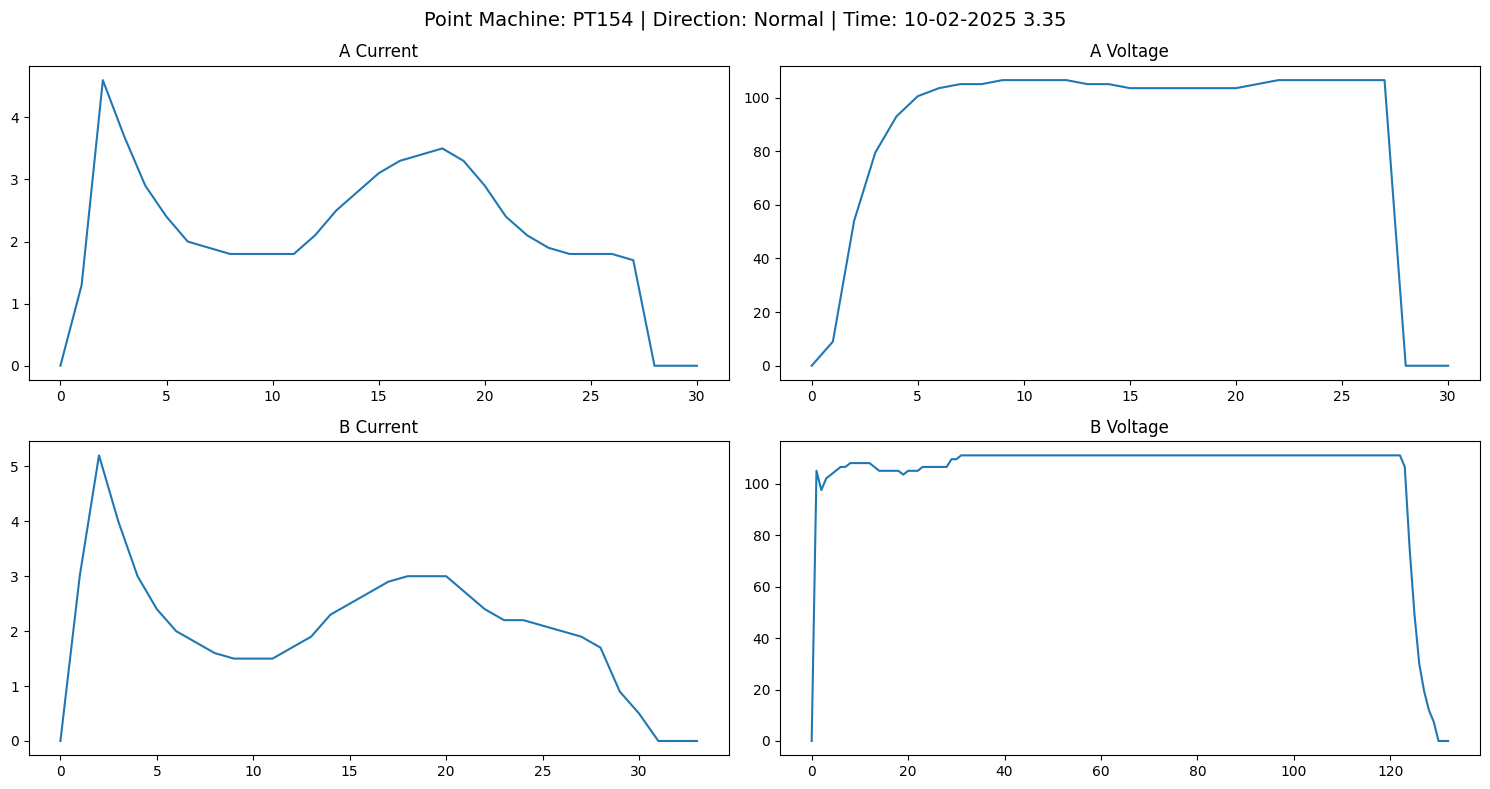

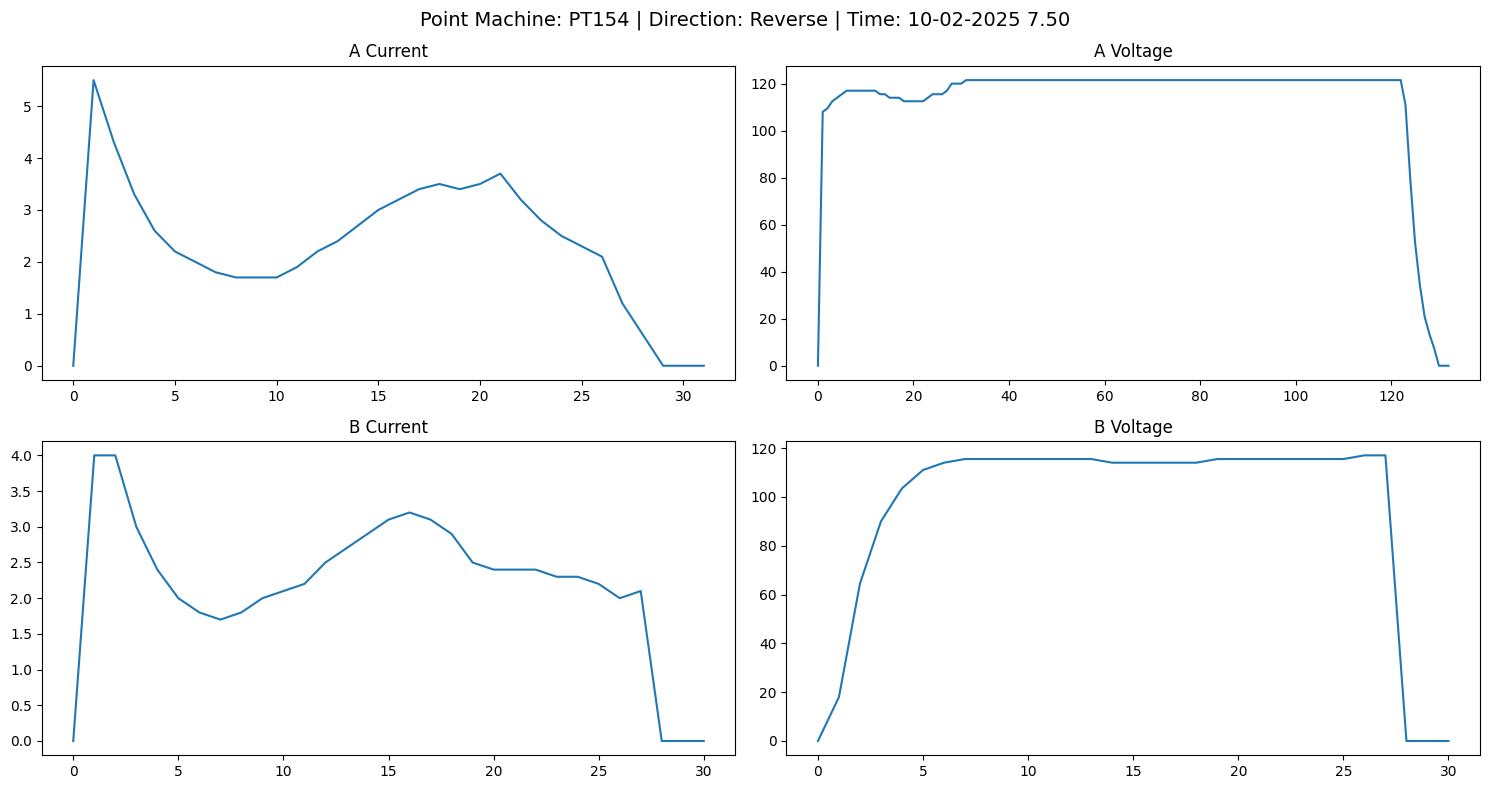

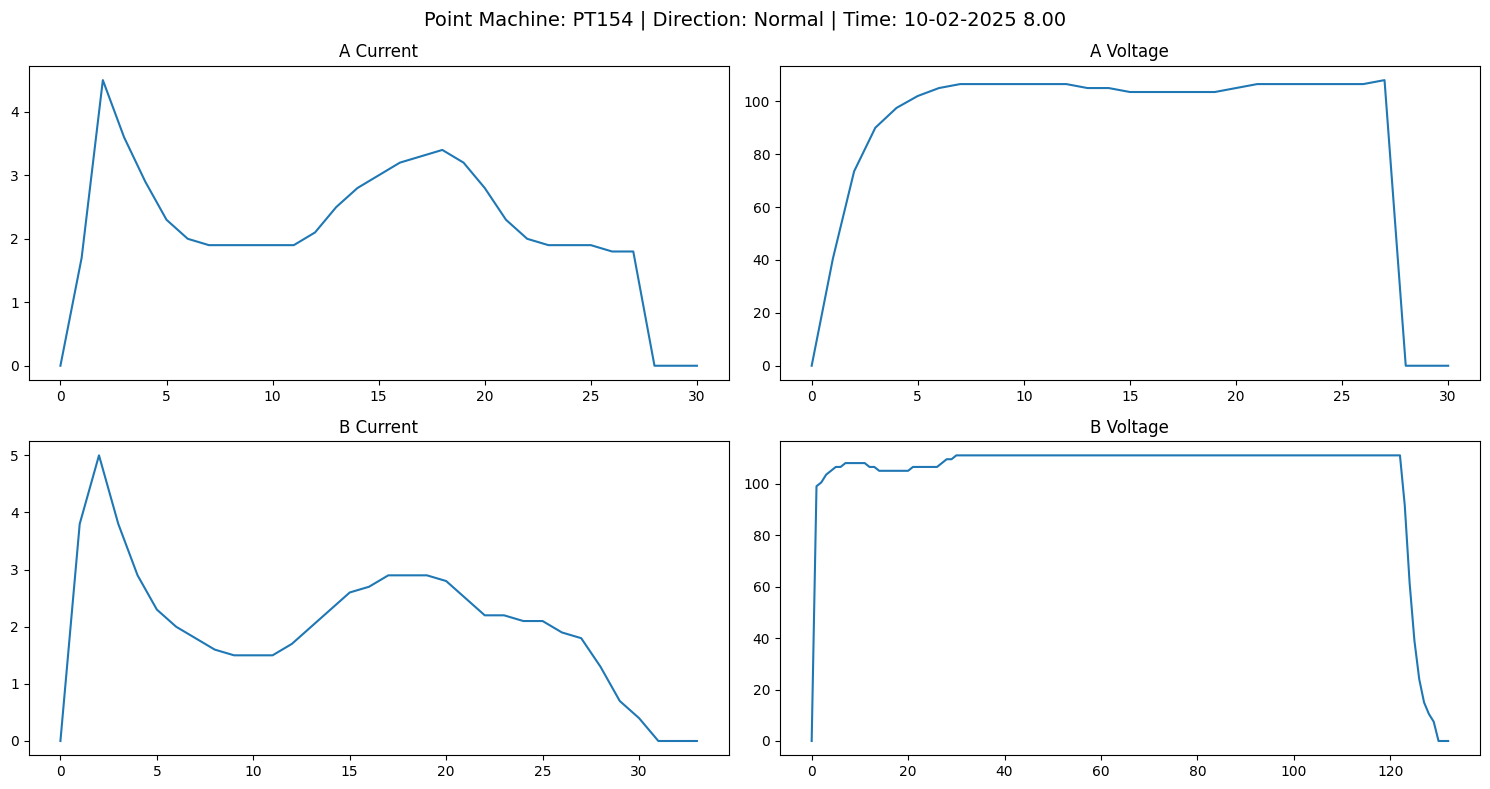

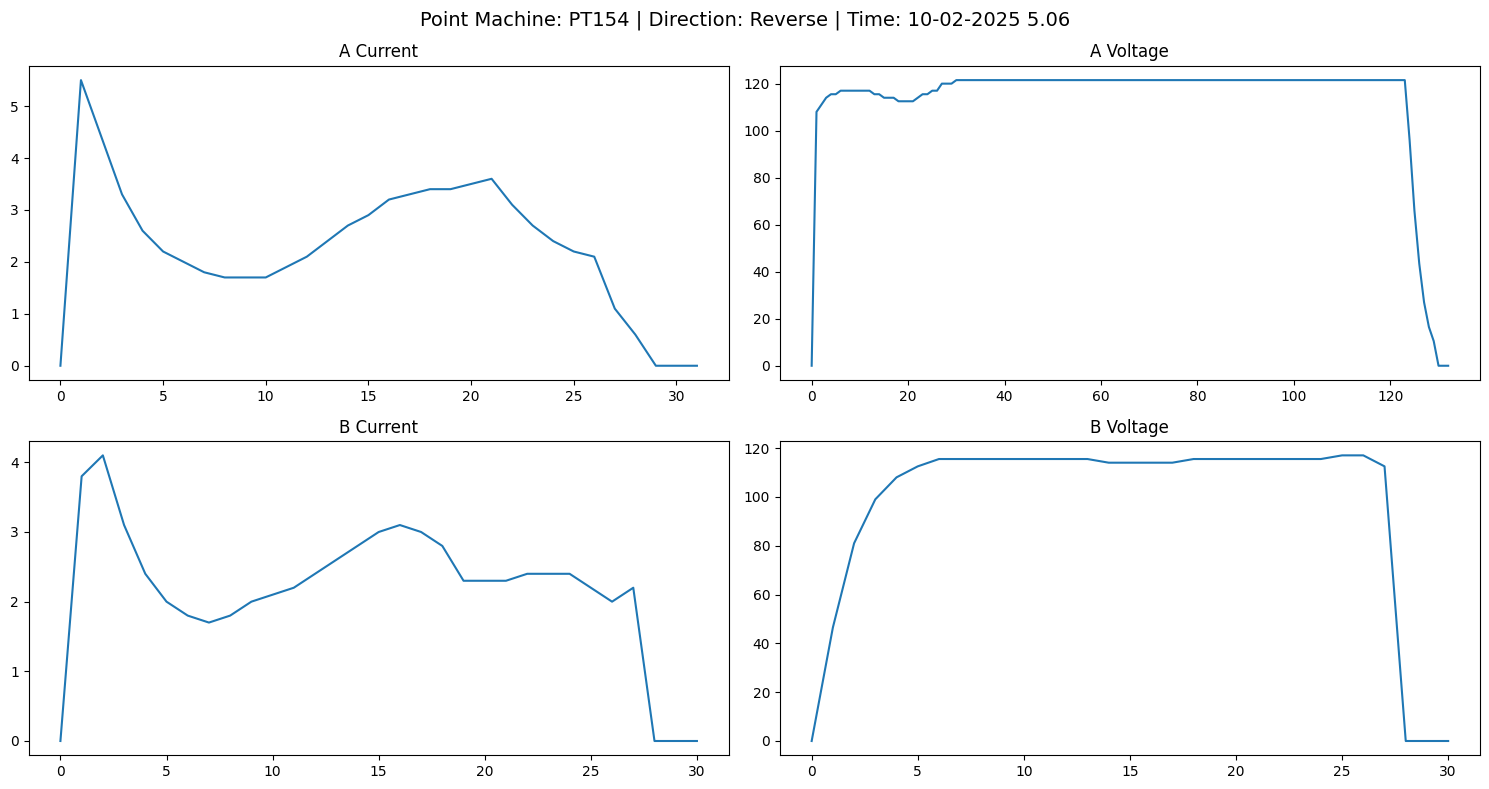

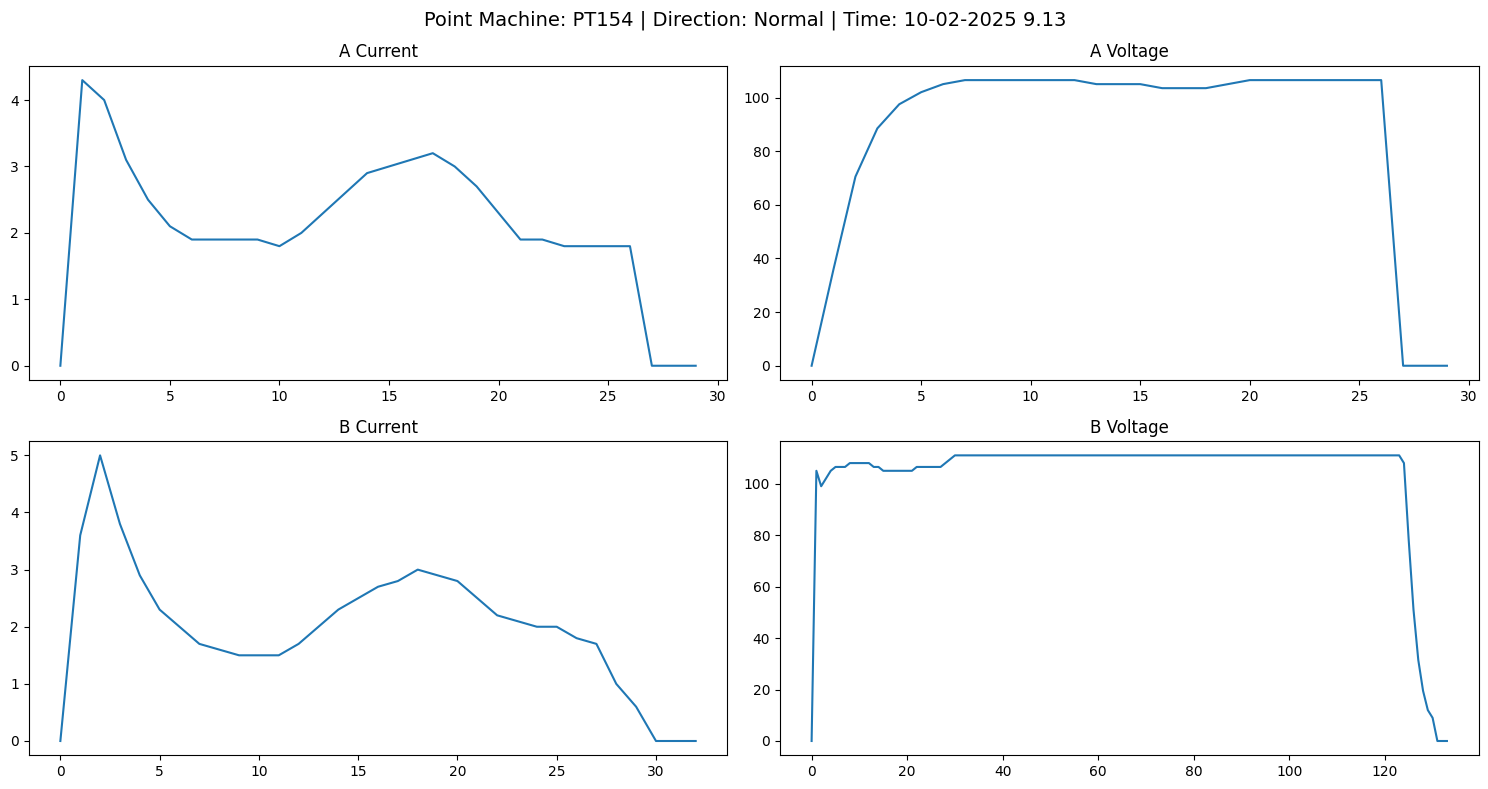

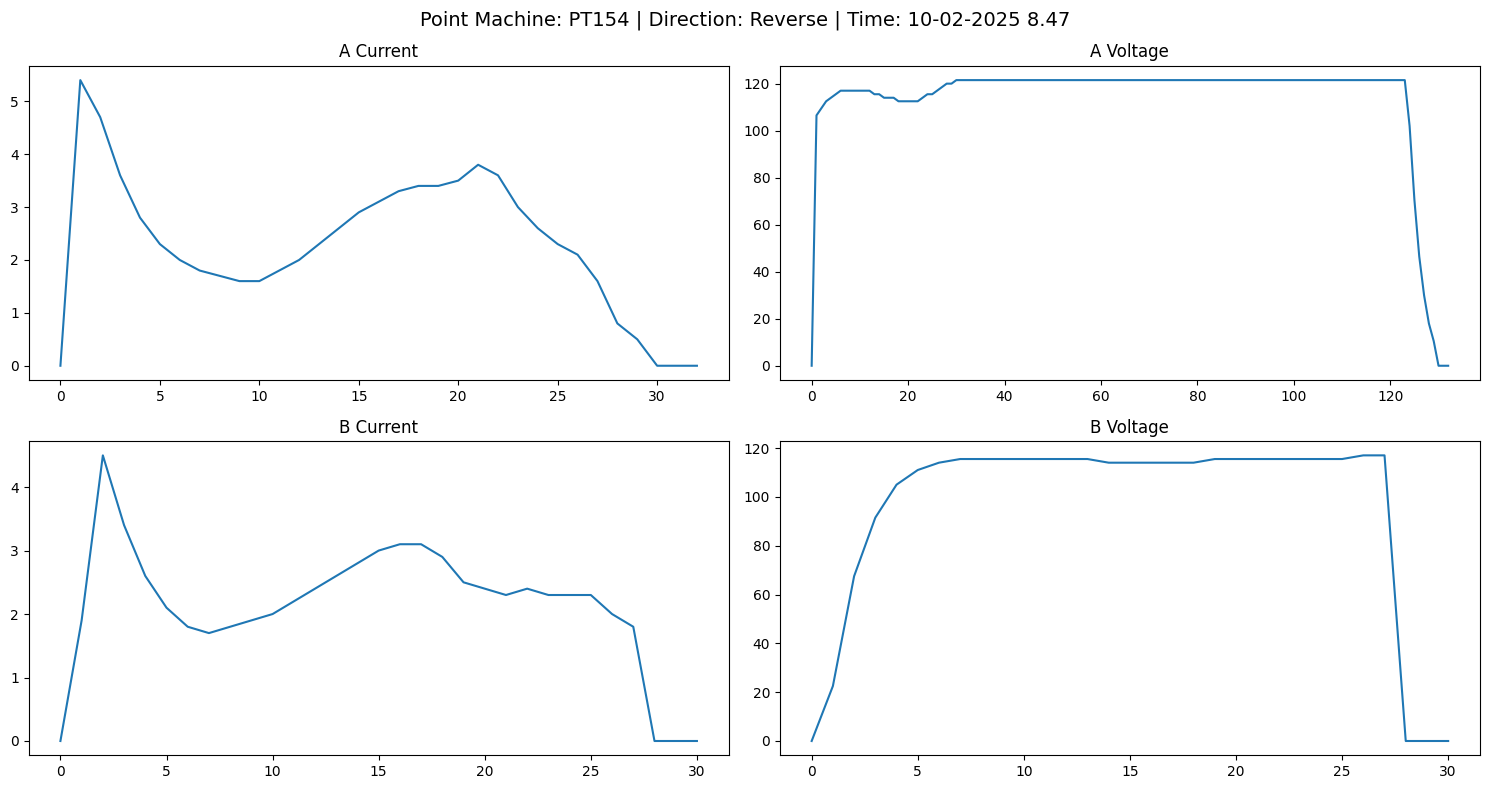

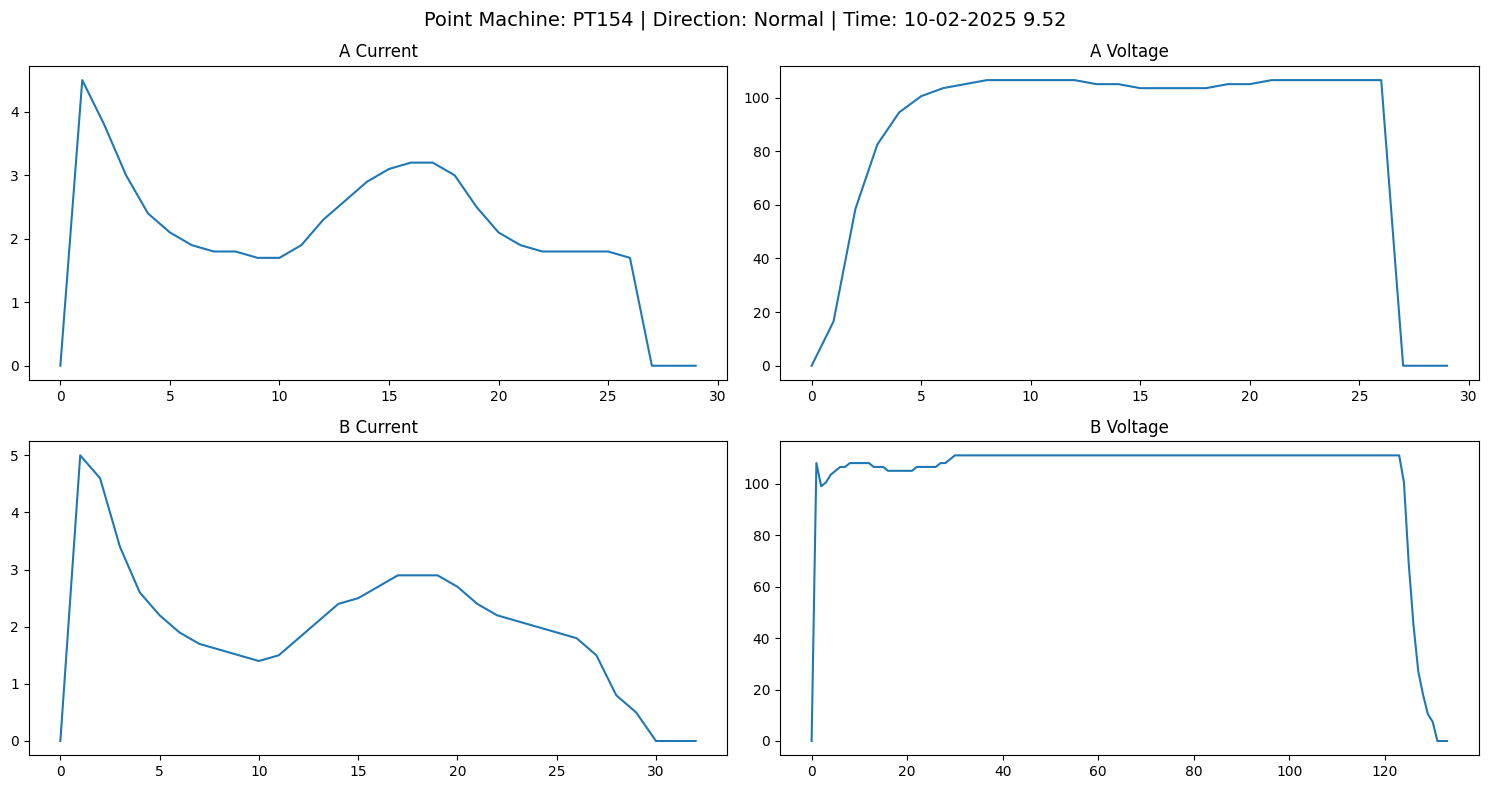

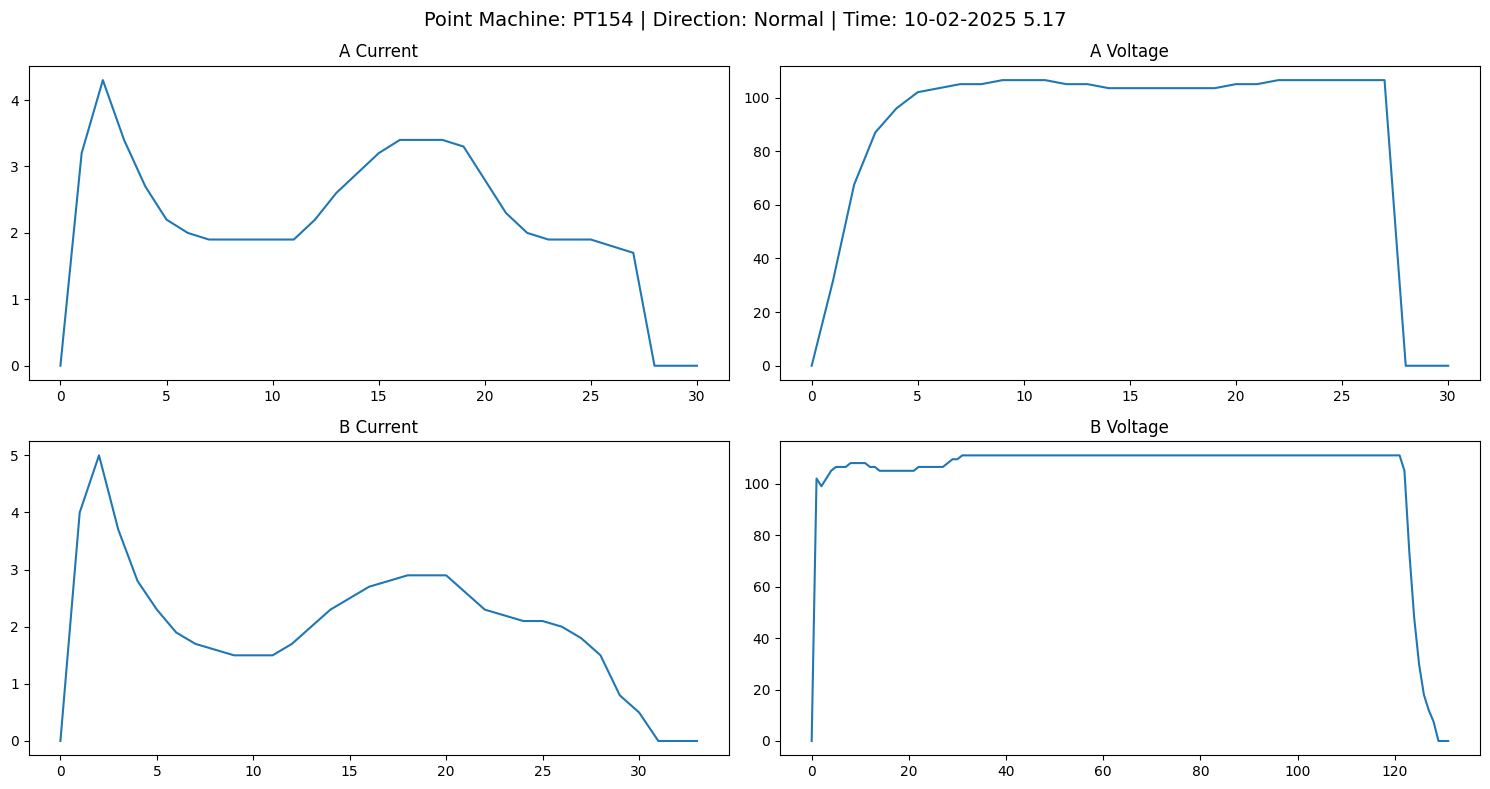

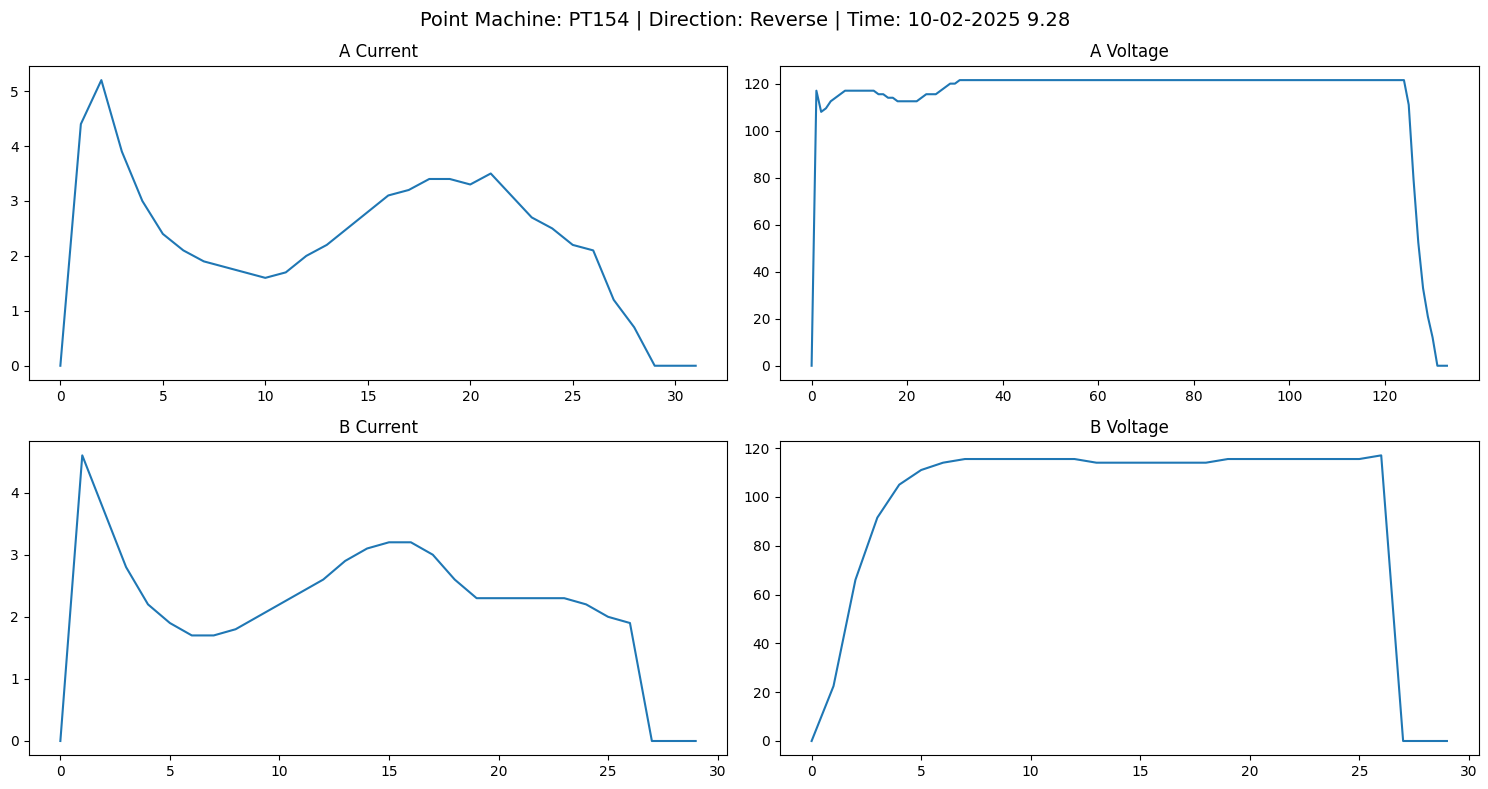

In [22]:
plot_point_machine("PT154", n_samples=10)
#'PT74' 'PT76' 'PT77' 'PT57' 'PT54' 'PT41' 'PT102' 'PT103' 'PT154'


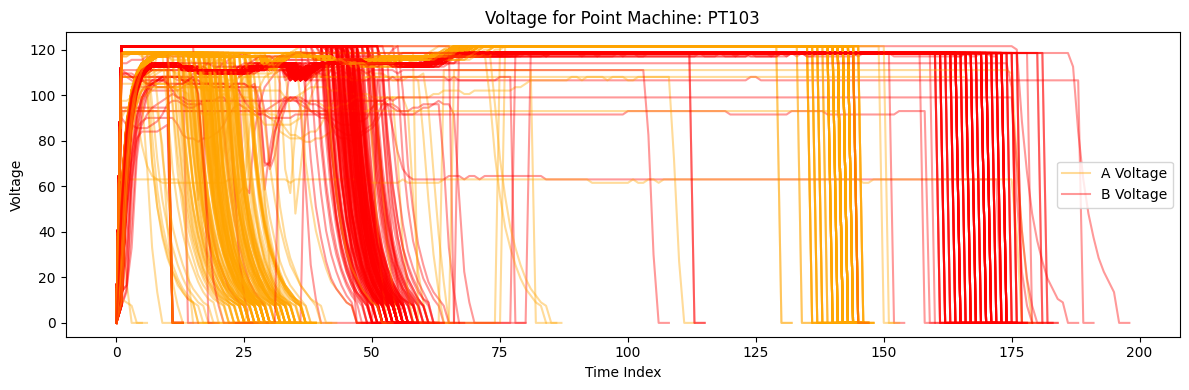

In [6]:
import ast
import matplotlib.pyplot as plt

# Convert stringified lists to actual lists
def safe_literal_eval(val):
    if isinstance(val, str):
        try:
            return ast.literal_eval(val)
        except:
            return []  # fallback in case of bad string
    elif isinstance(val, list):
        return val
    else:
        return []

# Apply the safe converter
for col in ['A Current', 'A Voltage', 'B Current', 'B Voltage']:
    ts_data[col] = ts_data[col].apply(safe_literal_eval)

# Function to plot combined current and voltage graphs per Point Machine
def plot_point_machine_combined(machine_name):
    subset = ts_data[ts_data['Point Machine Name'] == machine_name]

    # --- Plot Current ---
    plt.figure(figsize=(12, 4))
    for idx, row in subset.iterrows():
        plt.plot(row['A Current'], alpha=0.4, label='A Current' if idx == subset.index[0] else "", color='blue')
        plt.plot(row['B Current'], alpha=0.4, label='B Current' if idx == subset.index[0] else "", color='green')
    plt.title(f"Current for Point Machine: {machine_name}")
    plt.xlabel("Time Index")
    plt.ylabel("Current")
    plt.ylim(0,10)
    plt.xlim(0,300)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # --- Plot Voltage ---
    plt.figure(figsize=(12, 4))
    for idx, row in subset.iterrows():
        plt.plot(row['A Voltage'], alpha=0.4, label='A Voltage' if idx == subset.index[0] else "", color='orange')
        plt.plot(row['B Voltage'], alpha=0.4, label='B Voltage' if idx == subset.index[0] else "", color='red')
    plt.title(f"Voltage for Point Machine: {machine_name}")
    plt.xlabel("Time Index")
    plt.ylabel("Voltage")
    # plt.ylim(0,1000)
    # plt.xlim(0,200)
    plt.legend(loc = "best")
    plt.tight_layout()
    plt.show()

# Loop through all point machines
# for machine in ts_data['Point Machine Name'].unique():
plot_point_machine_combined("PT103")


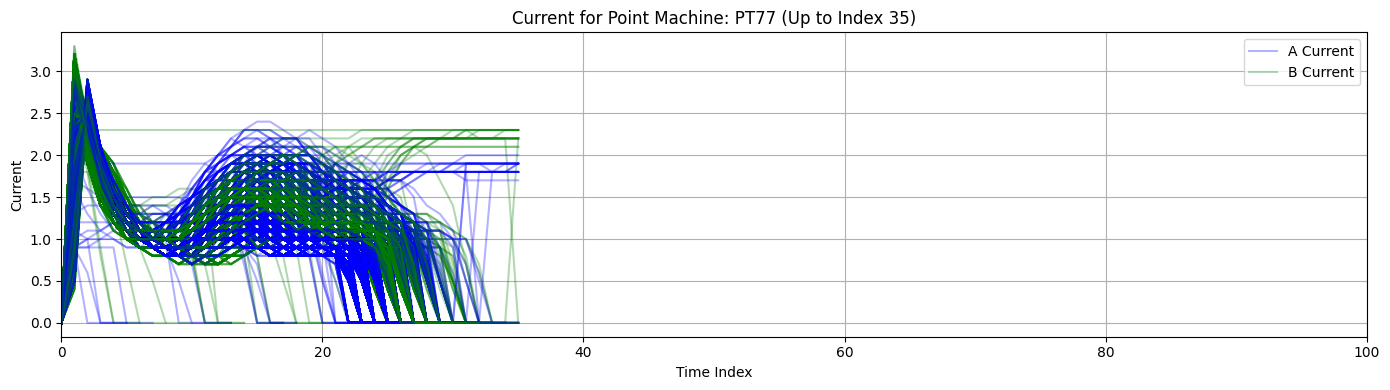

In [7]:
import ast
import matplotlib.pyplot as plt

# Safe parser: returns empty list on malformed input
def safe_parse(series_str):
    try:
        return ast.literal_eval(series_str)
    except:
        return []

# Apply safe parsing
for col in ['A Current', 'B Current']:
    ts_data[col] = ts_data[col].astype(str).apply(safe_parse)

# Plot with cutoff at index 35
def plot_currents_upto_35(machine_name):
    subset = ts_data[ts_data['Point Machine Name'] == machine_name]
    plt.figure(figsize=(14, 4))
    
    for idx, row in subset.iterrows():
        a_current = row['A Current'][:36]
        b_current = row['B Current'][:36]
        
        plt.plot(a_current, color='blue', alpha=0.3, label='A Current' if idx == subset.index[0] else "")
        plt.plot(b_current, color='green', alpha=0.3, label='B Current' if idx == subset.index[0] else "")
    
    plt.title(f"Current for Point Machine: {machine_name} (Up to Index 35)")
    plt.xlabel("Time Index")
    plt.ylabel("Current")
    plt.xlim(0, 100)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot for PT77
plot_currents_upto_35("PT77")


✅ Total valid samples for PT77 with length ≤ 36: 5040


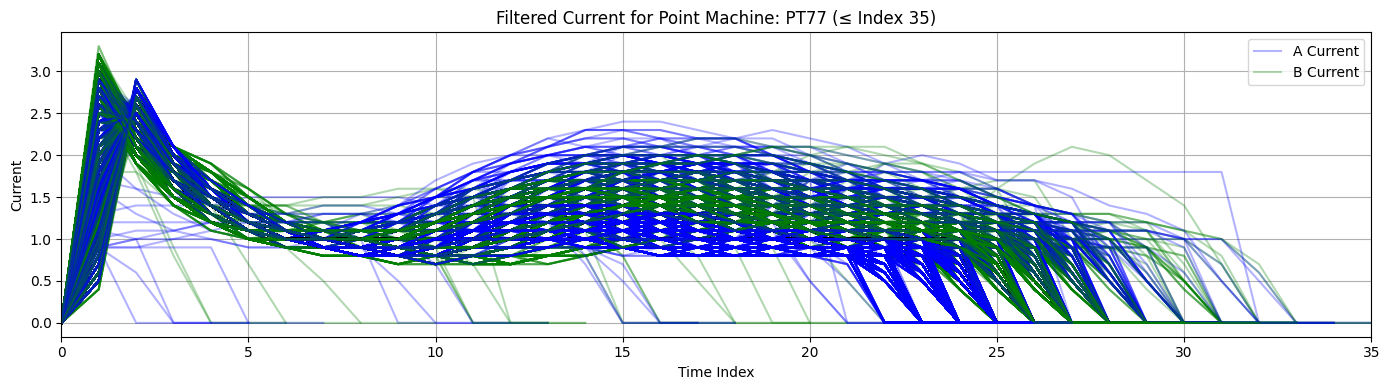

In [8]:
import ast
import matplotlib.pyplot as plt

# Safe parser for stringified lists
def safe_parse(series_str):
    try:
        return ast.literal_eval(series_str)
    except:
        return []

# Convert all relevant columns safely
for col in ['A Current', 'B Current']:
    ts_data[col] = ts_data[col].astype(str).apply(safe_parse)

# ✅ Plot + Count valid time series (ending before or at index 35)
def plot_and_count_valid_samples(machine_name):
    subset = ts_data[ts_data['Point Machine Name'] == machine_name]
    
    # Filter samples where both A and B current length ≤ 36
    valid_subset = subset[
        (subset['A Current'].apply(len) <= 36) &
        (subset['B Current'].apply(len) <= 36)
    ]
    
    print(f"✅ Total valid samples for {machine_name} with length ≤ 36: {len(valid_subset)}")

    # Plotting
    plt.figure(figsize=(14, 4))
    for idx, row in valid_subset.iterrows():
        plt.plot(row['A Current'], color='blue', alpha=0.3, label='A Current' if idx == valid_subset.index[0] else "")
        plt.plot(row['B Current'], color='green', alpha=0.3, label='B Current' if idx == valid_subset.index[0] else "")

    plt.title(f"Filtered Current for Point Machine: {machine_name} (≤ Index 35)")
    plt.xlabel("Time Index")
    plt.ylabel("Current")
    plt.xlim(0, 35)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 🔍 Example usage:
plot_and_count_valid_samples("PT77")


✅ Total valid samples for PT74 with length ≤ 36: 390


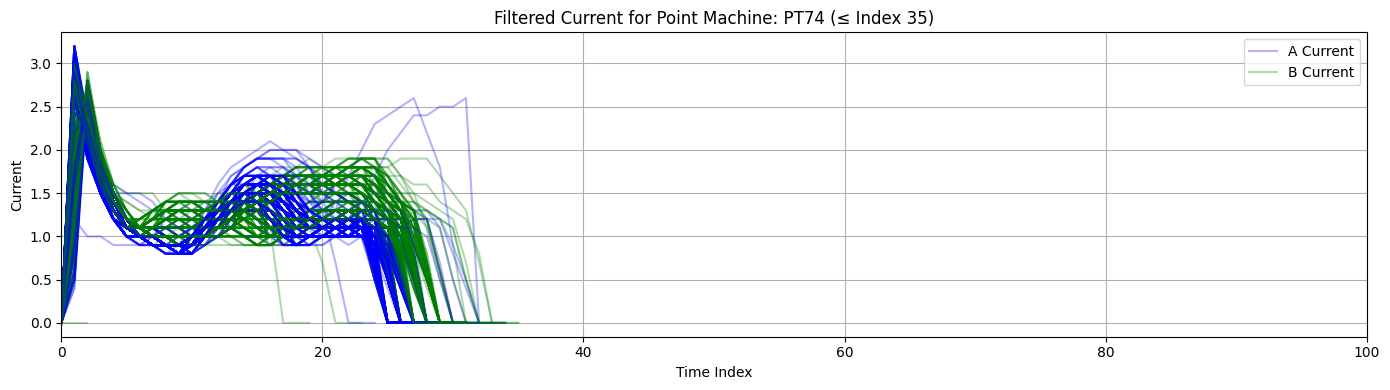

✅ Total valid samples for PT76 with length ≤ 36: 2472


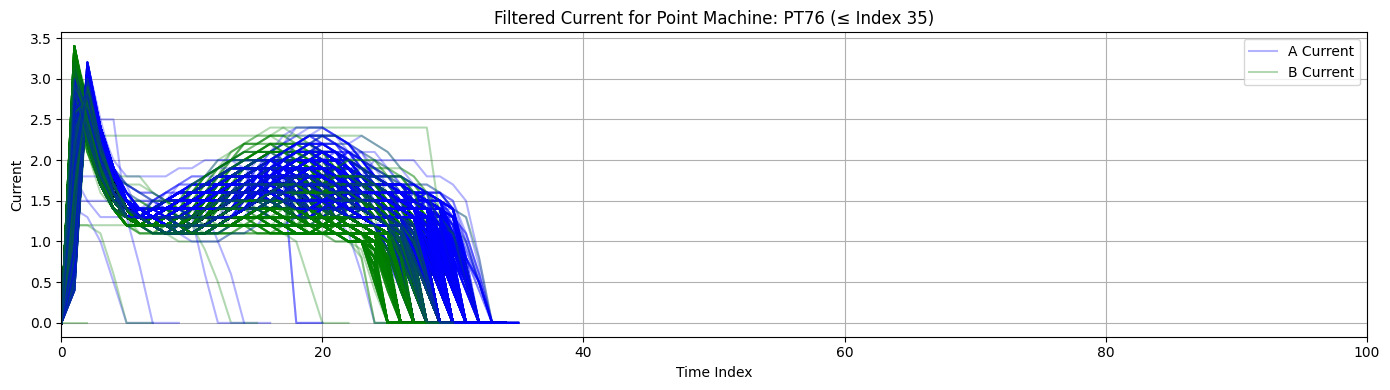

✅ Total valid samples for PT77 with length ≤ 36: 5040


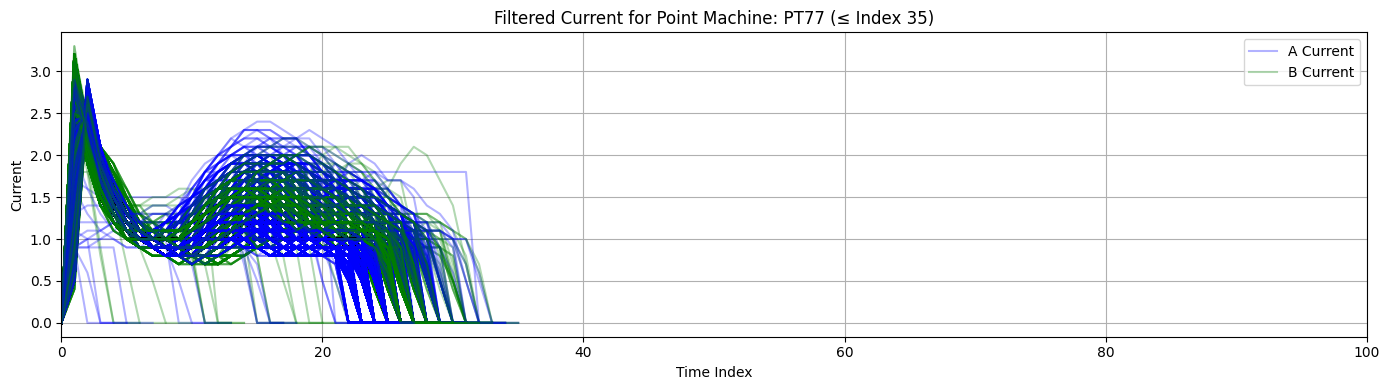

✅ Total valid samples for PT57 with length ≤ 36: 1858


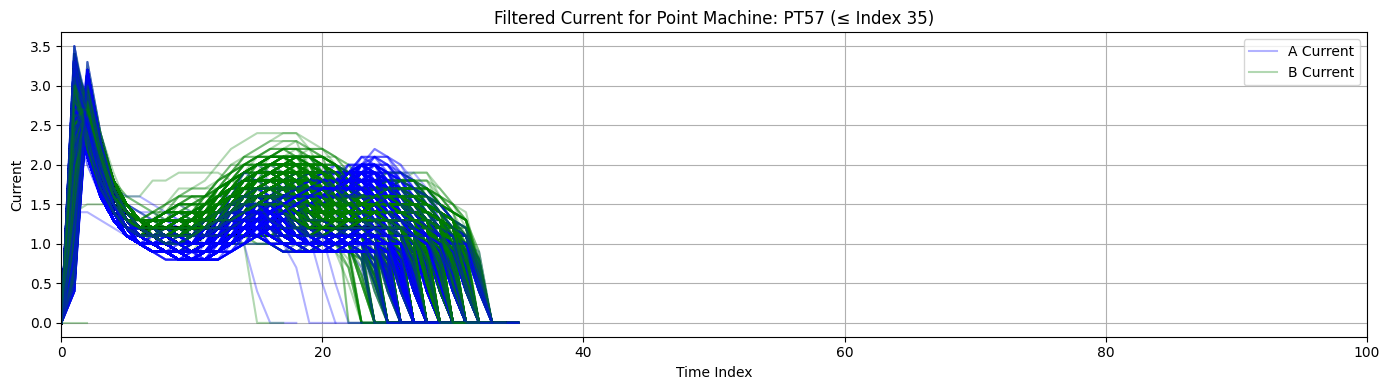

✅ Total valid samples for PT54 with length ≤ 36: 814


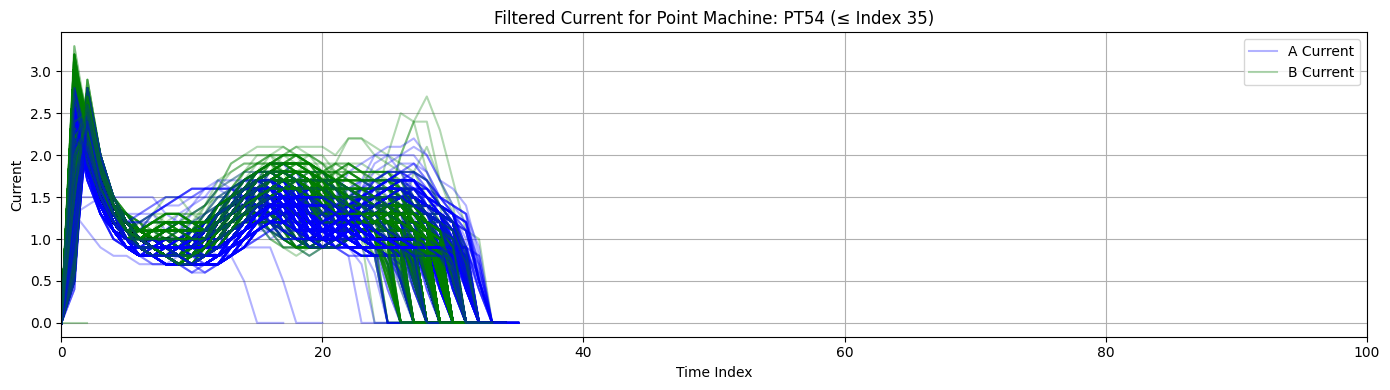

✅ Total valid samples for PT41 with length ≤ 36: 134


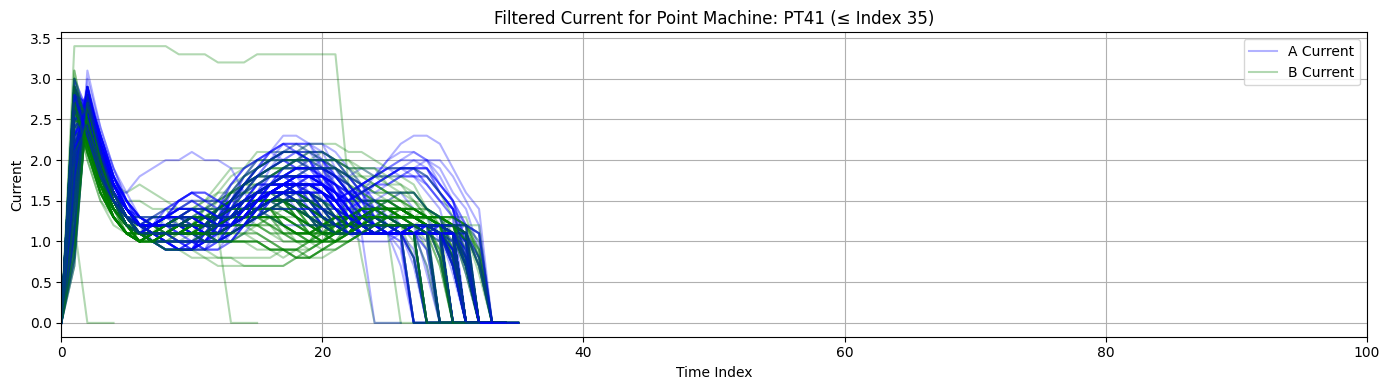

In [39]:
import ast
import matplotlib.pyplot as plt

# Safe parser for stringified lists
def safe_parse(series_str):
    try:
        return ast.literal_eval(series_str)
    except:
        return []

# Convert all relevant columns safely
for col in ['A Current', 'B Current']:
    ts_data[col] = ts_data[col].astype(str).apply(safe_parse)

# ✅ Plot + Count valid time series (ending before or at index 35)
def plot_and_count_valid_samples(machine_name):
    subset = ts_data[ts_data['Point Machine Name'] == machine_name]
    
    # Filter samples where both A and B current length ≤ 36
    valid_subset = subset[
        (subset['A Current'].apply(len) <= 36) &
        (subset['B Current'].apply(len) <= 36)
    ]
    
    print(f"✅ Total valid samples for {machine_name} with length ≤ 36: {len(valid_subset)}")

    # Plotting
    plt.figure(figsize=(14, 4))
    for idx, row in valid_subset.iterrows():
        plt.plot(row['A Current'], color='blue', alpha=0.3, label='A Current' if idx == valid_subset.index[0] else "")
        plt.plot(row['B Current'], color='green', alpha=0.3, label='B Current' if idx == valid_subset.index[0] else "")

    plt.title(f"Filtered Current for Point Machine: {machine_name} (≤ Index 35)")
    plt.xlabel("Time Index")
    plt.ylabel("Current")
    plt.xlim(0, 100)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 🔍 Example usage:
samples = ['PT74', 'PT76' ,'PT77' ,'PT57' ,'PT54' ,'PT41']
for mach in samples:
    plot_and_count_valid_samples(mach)

#'PT74' 'PT76' 'PT77' 'PT57' 'PT54' 'PT41' 'PT102' 'PT103' 'PT154'

#group 'PT74' 'PT76' 'PT77' 'PT57' 'PT54' 'PT41'
#group 'PT154'
#group 'PT103' high V


In [9]:
import pandas as pd
import ast

# Load your dataset
# df = pd.read_csv("SECR2_TWS.csv")

# Define point machines of interest
samples = ['PT74', 'PT76', 'PT77', 'PT57', 'PT54', 'PT41']

# Safe parse for time series columns
def safe_parse(series_str):
    try:
        return ast.literal_eval(series_str)
    except:
        return []

# Parse all time series columns
for col in ['A Current', 'B Current', 'A Voltage', 'B Voltage']:
    ts_data[col] = ts_data[col].astype(str).apply(safe_parse)

# Filter based on selected machines and time series length ≤ 36
filtered_df = ts_data[
    (ts_data['Point Machine Name'].isin(samples)) &
    (ts_data['A Current'].apply(len) <= 36) &
    (ts_data['B Current'].apply(len) <= 36) &
    (ts_data['A Voltage'].apply(len) <= 36) &
    (ts_data['B Voltage'].apply(len) <= 36)
]

print(f"✅ Filtered data shape: {filtered_df.shape}")
filtered_df


✅ Filtered data shape: (5453, 12)


Time      Site Name Point Machine Name Direction  \
996     10-08-2024 2.08  Mandir Hasaud               PT74   Reverse   
997     10-08-2024 2.34  Mandir Hasaud               PT74    Normal   
998     10-08-2024 4.19  Mandir Hasaud               PT74   Reverse   
999     10-08-2024 4.29  Mandir Hasaud               PT74    Normal   
1000    10-08-2024 8.26  Mandir Hasaud               PT74   Reverse   
...                 ...            ...                ...       ...   
11838   08-09-2024 8.43            RVH               PT41   Reverse   
11939   21-10-2024 0.29            RVH               PT41   Reverse   
11989  06-11-2024 19.20            RVH               PT41   Reverse   
11995   08-11-2024 6.22            RVH               PT41   Reverse   
12081  10-01-2025 15.44            RVH               PT41   Reverse   

                                               A Current  \
996    [0.0, 2.9, 2.1, 1.6, 1.3, 1.1, 1.0, 1.0, 0.9, ...   
997    [0.0, 1.6, 2.6, 1.9, 1.4, 1.2, 1.1, 1.1, 1.0, ...   
998    [0.0, 2.8, 2.3, 1.7, 1.4, 1.1, 1.0, 0.9, 0.9, ...   
999    [0.0, 3.1, 2.1, 1.6, 1.3, 1.1, 1.1, 1.1, 1.0, ...   
1000   [0.0, 2.9, 2.1, 1.6, 1.3, 1.1, 1.0, 0.9, 0.9, ...   
...                                                  ...   
11838  [0.0, 2.7, 2.2, 1.7, 1.5, 1.2, 1.1, 1.0, 0.9, ...   
11939  [0.0, 2.6, 2.5, 1.9, 1.5, 1.3, 1.1, 1.0, 1.0, ...   
11989  [0.0, 0.9, 2.8, 2.2, 1.7, 1.4, 1.2, 1.1, 1.0, ...   
11995  [0.0, 2.9, 2.3, 1.8, 1.4, 1.2, 1.1, 1.0, 1.0, ...   
12081  [0.0, 2.2, 2.6, 1.9, 1.5, 1.3, 1.1, 1.0, 0.9, ...   

                                               A Voltage  \
996    [0.0, 31.5, 85.5, 111.0, 123.0, 129.0, 130.5, ...   
997    [0.0, 63.0, 100.5, 118.5, 126.0, 130.5, 132.0,...   
998    [0.0, 25.5, 82.5, 109.5, 123.0, 129.0, 132.0, ...   
999    [0.0, 9.0, 76.5, 106.5, 121.5, 127.5, 132.0, 1...   
1000   [0.0, 15.0, 78.0, 108.0, 121.5, 127.5, 130.5, ...   
...                                                  ...   
11838  [0.0, 12.0, 22.5, 42.0, 81.0, 100.5, 109.5, 11...   
11939  [0.0, 12.0, 12.0, 61.5, 91.5, 105.0, 111.0, 11...   
11989  [0.0, 12.0, 12.0, 63.0, 91.5, 105.0, 111.0, 11...   
11995  [0.0, 61.5, 91.5, 105.0, 111.0, 112.5, 114.0, ...   
12081  [0.0, 10.5, 13.5, 49.5, 85.5, 102.0, 109.5, 11...   

                                               B Current  \
996    [0.0, 2.4, 2.5, 1.8, 1.4, 1.2, 1.1, 1.0, 1.0, ...   
997    [0.0, 2.2, 2.6, 1.9, 1.5, 1.2, 1.1, 1.1, 1.1, ...   
998    [0.0, 2.9, 2.3, 1.7, 1.4, 1.2, 1.0, 1.0, 1.0, ...   
999    [0.0, 3.0, 2.1, 1.6, 1.3, 1.1, 1.0, 1.1, 1.1, ...   
1000   [0.0, 3.0, 2.2, 1.7, 1.3, 1.1, 1.0, 1.0, 1.0, ...   
...                                                  ...   
11838  [0.0, 3.0, 2.3, 1.8, 1.5, 1.3, 1.2, 1.1, 1.1, ...   
11939  [0.0, 1.1, 2.9, 2.2, 1.7, 1.4, 1.2, 1.2, 1.1, ...   
11989  [0.0, 2.8, 2.5, 1.9, 1.5, 1.3, 1.2, 1.1, 1.1, ...   
11995  [0.0, 3.1, 2.3, 1.8, 1.5, 1.3, 1.2, 1.2, 1.2, ...   
12081  [0.0, 2.4, 2.7, 2.0, 1.6, 1.3, 1.2, 1.1, 1.1, ...   

                                               B Voltage Type of A Type of B  \
996    [0.0, 9.0, 75.0, 105.0, 120.0, 126.0, 130.5, 1...       TWS       TWS   
997    [0.0, 70.5, 103.5, 120.0, 127.5, 130.5, 133.5,...       TWS       TWS   
998    [0.0, 39.0, 88.5, 111.0, 123.0, 127.5, 130.5, ...       TWS       TWS   
999    [0.0, 25.5, 82.5, 109.5, 121.5, 129.0, 132.0, ...       TWS       TWS   
1000   [0.0, 15.0, 76.5, 106.5, 120.0, 127.5, 130.5, ...       TWS       TWS   
...                                                  ...       ...       ...   
11838  [0.0, 12.0, 21.0, 49.5, 85.5, 103.5, 111.0, 11...       TWS       TWS   
11939  [0.0, 10.5, 12.0, 57.0, 93.0, 109.5, 117.0, 12...       TWS       TWS   
11989  [0.0, 10.5, 13.5, 58.5, 93.0, 109.5, 115.5, 11...       TWS       TWS   
11995  [0.0, 60.0, 93.0, 109.5, 115.5, 118.5, 118.5, ...       TWS       TWS   
12081  [0.0, 16.5, 34.5, 81.0, 103.5, 114.0, 118.5, 1...       TWS       TWS   

       Polling of A  Polling of B  
996   

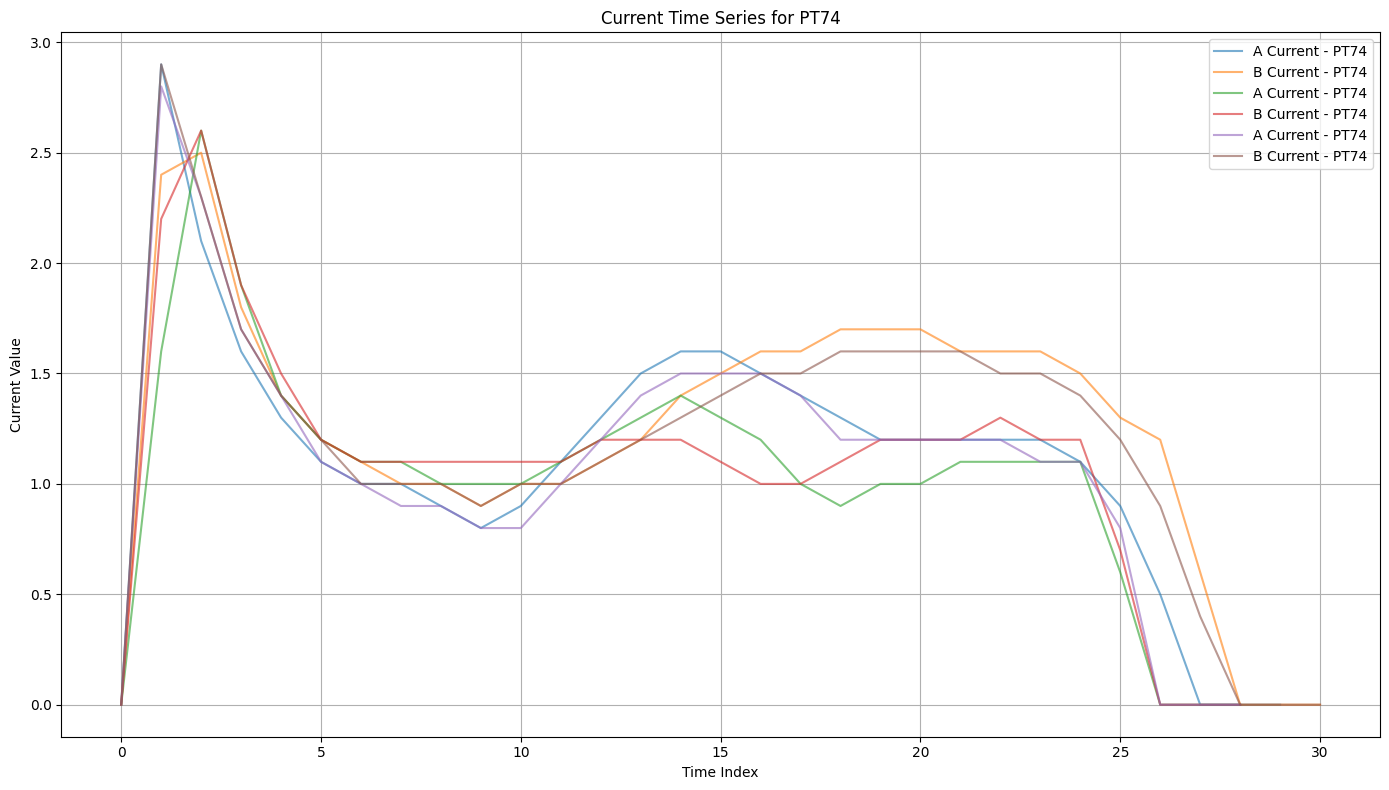

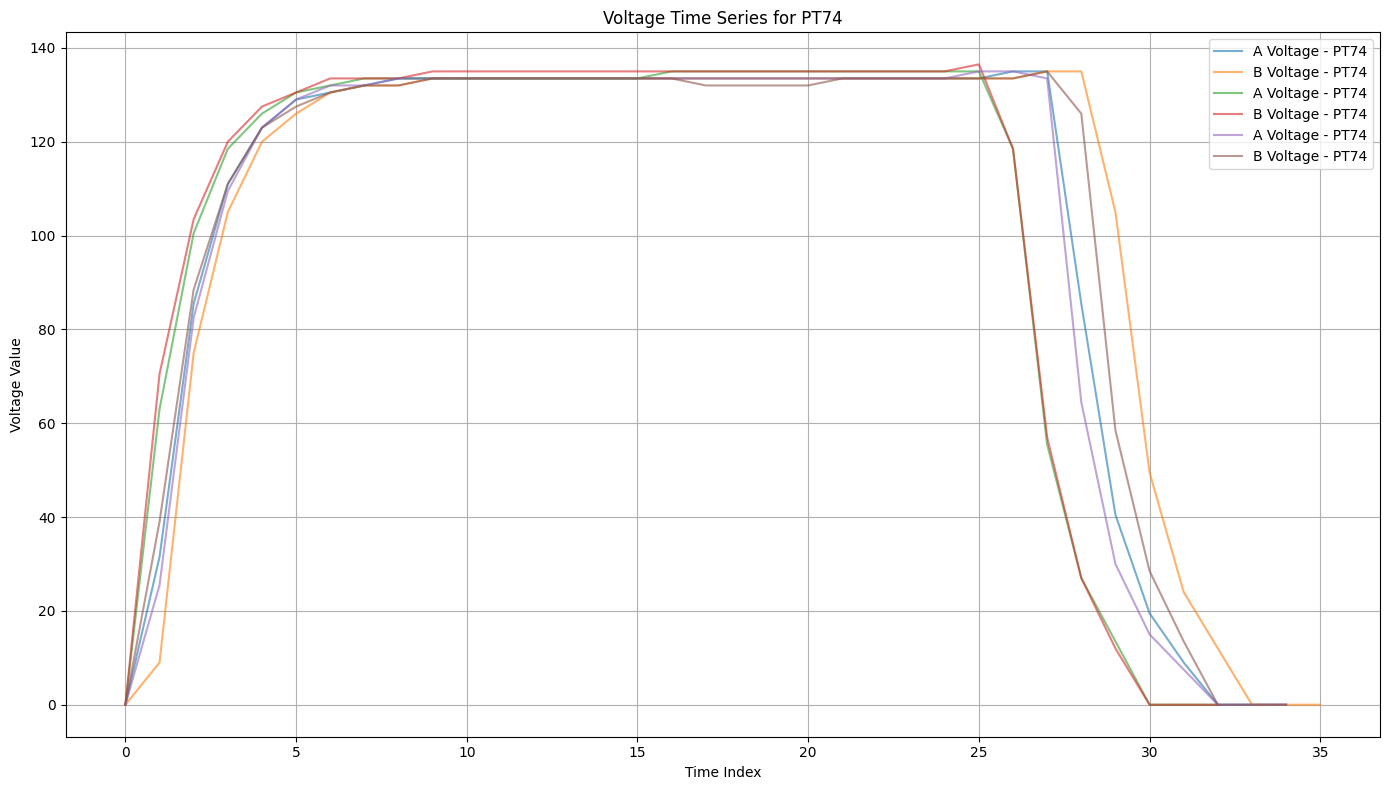

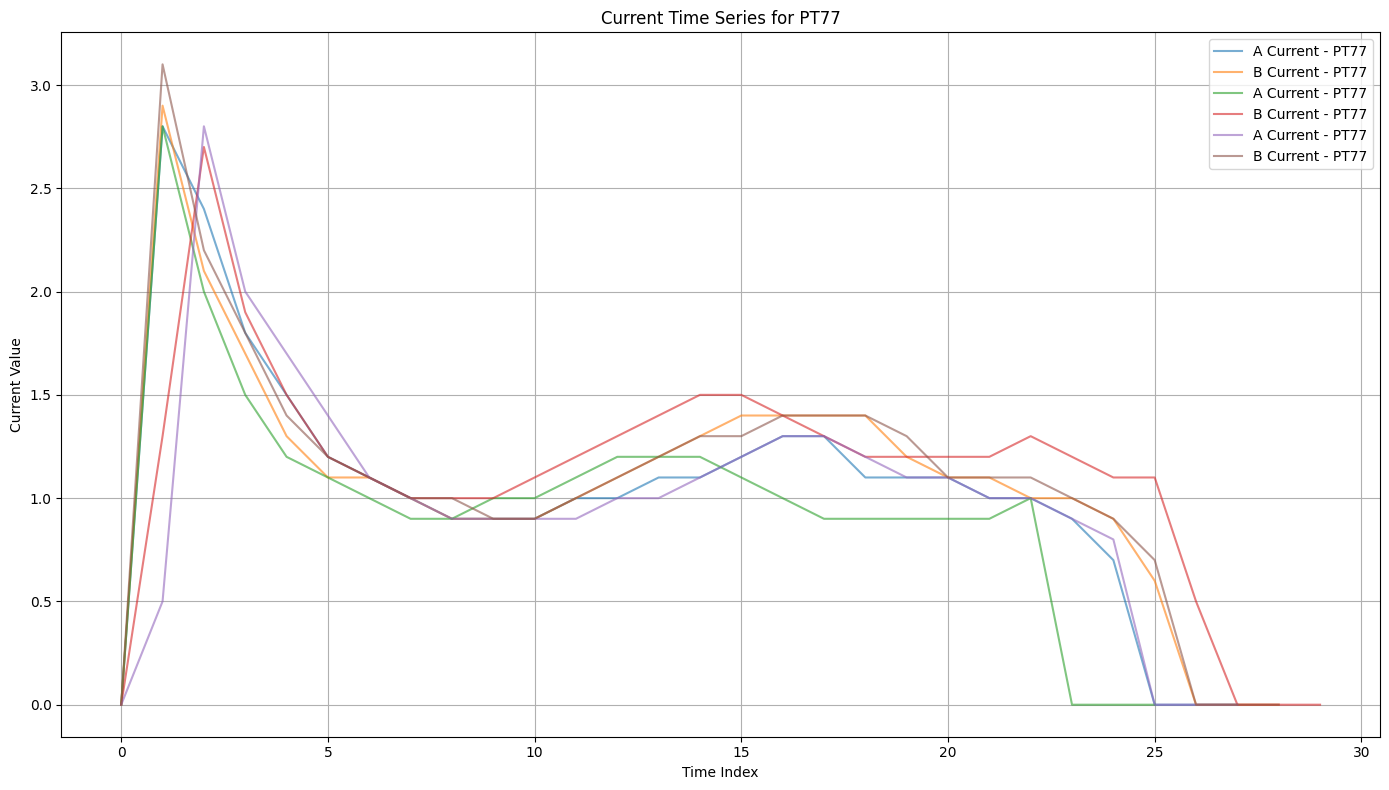

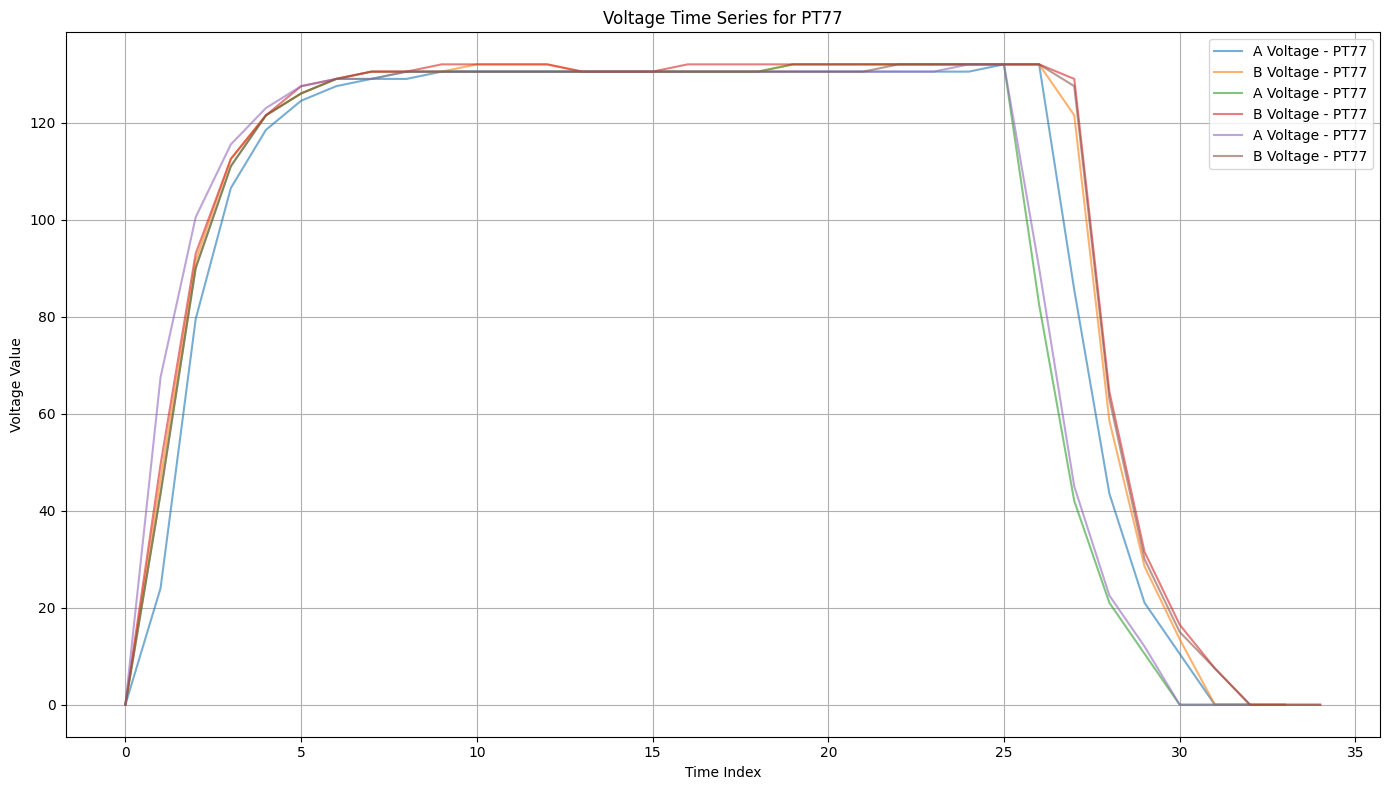

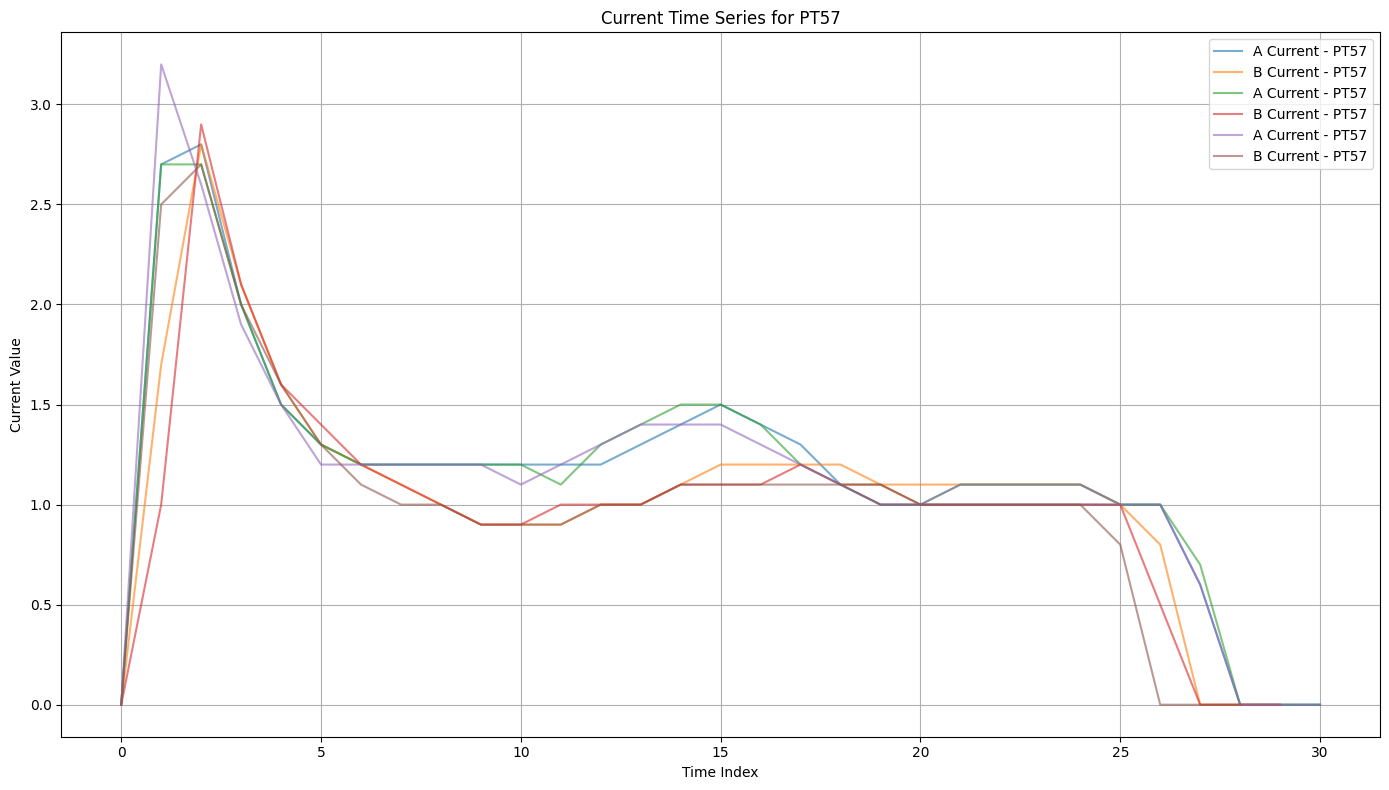

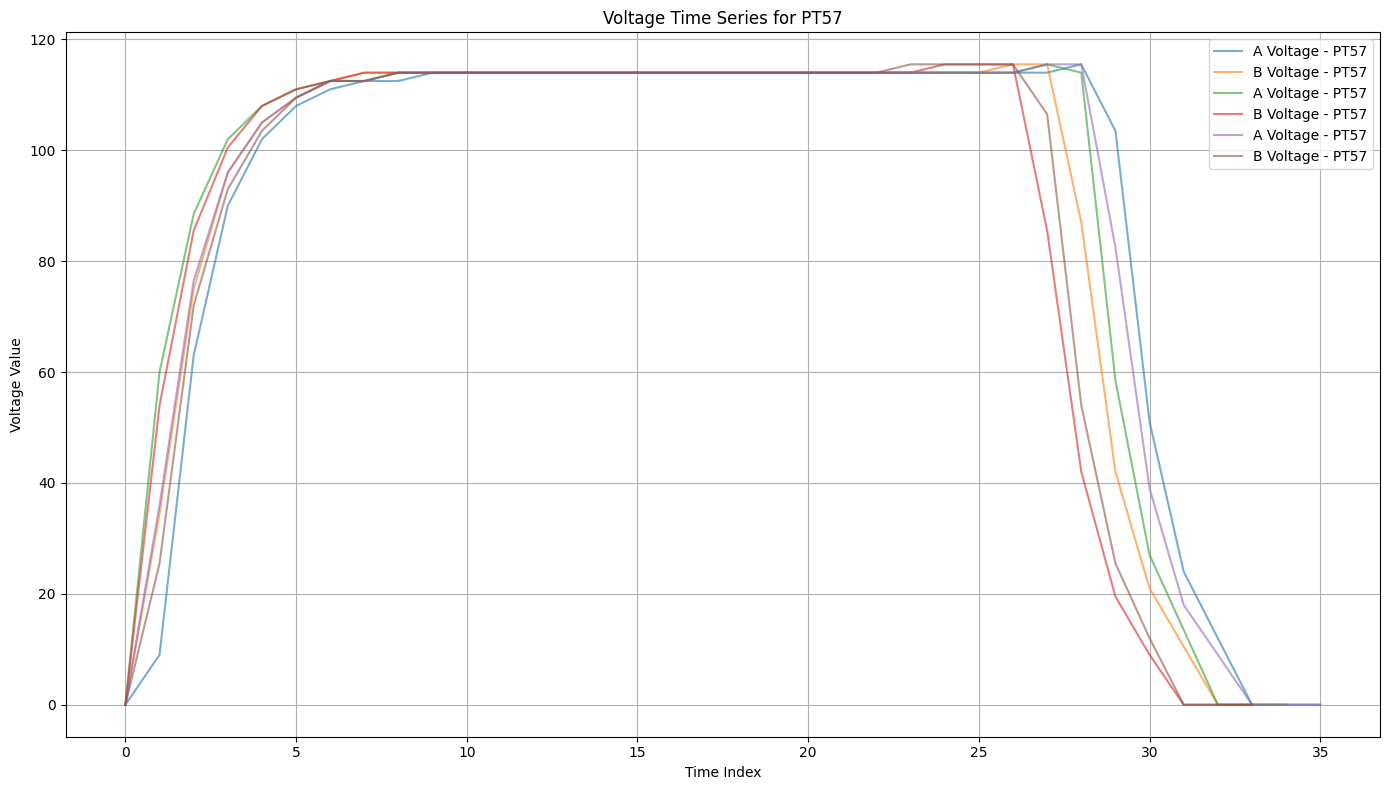

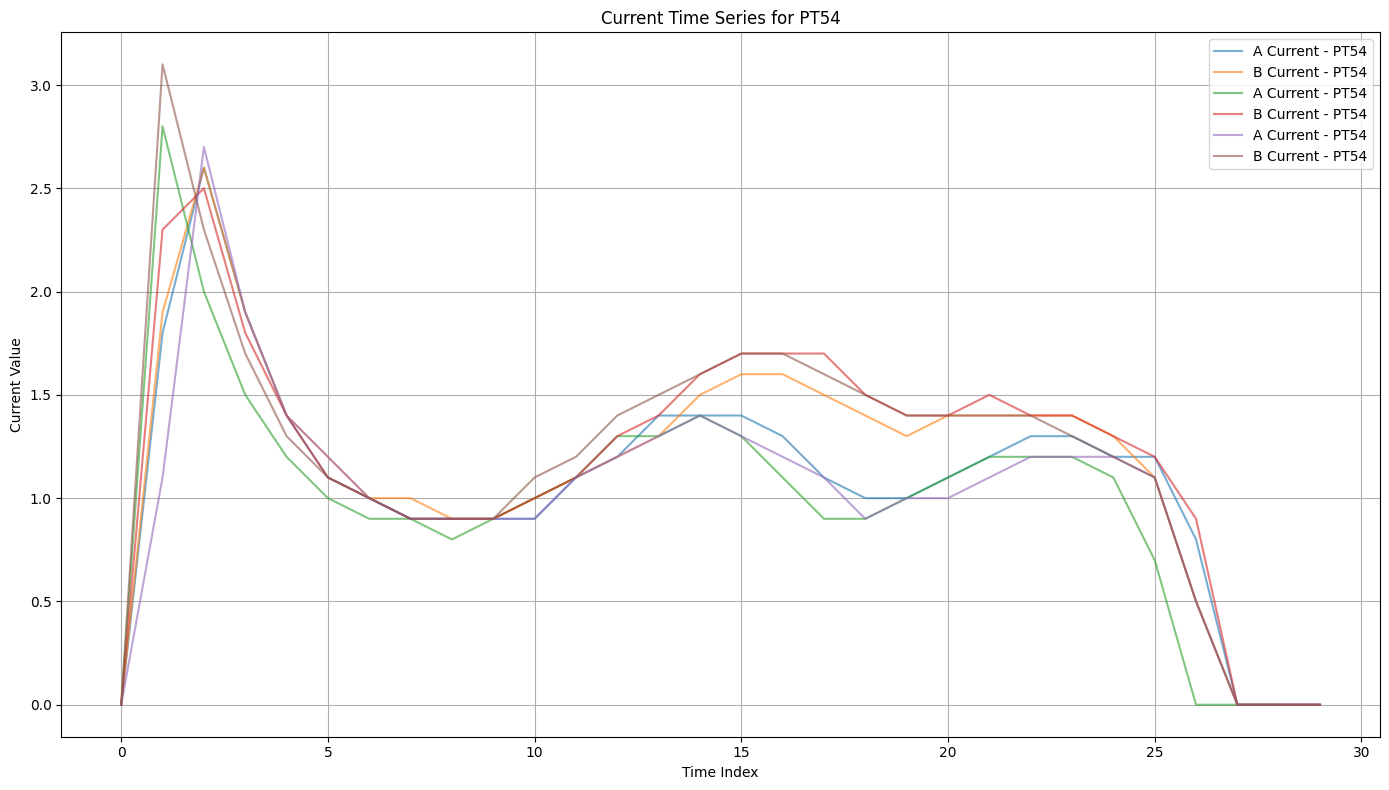

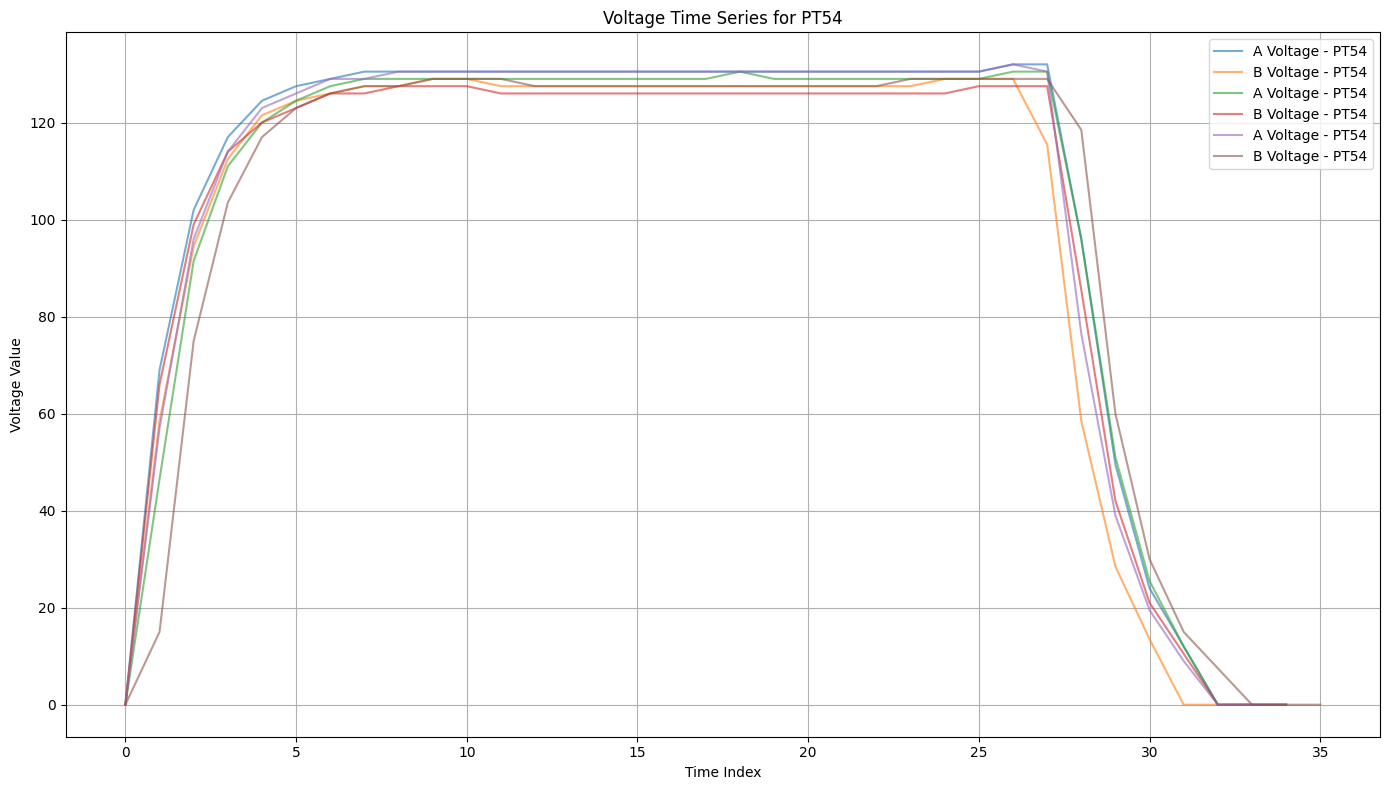

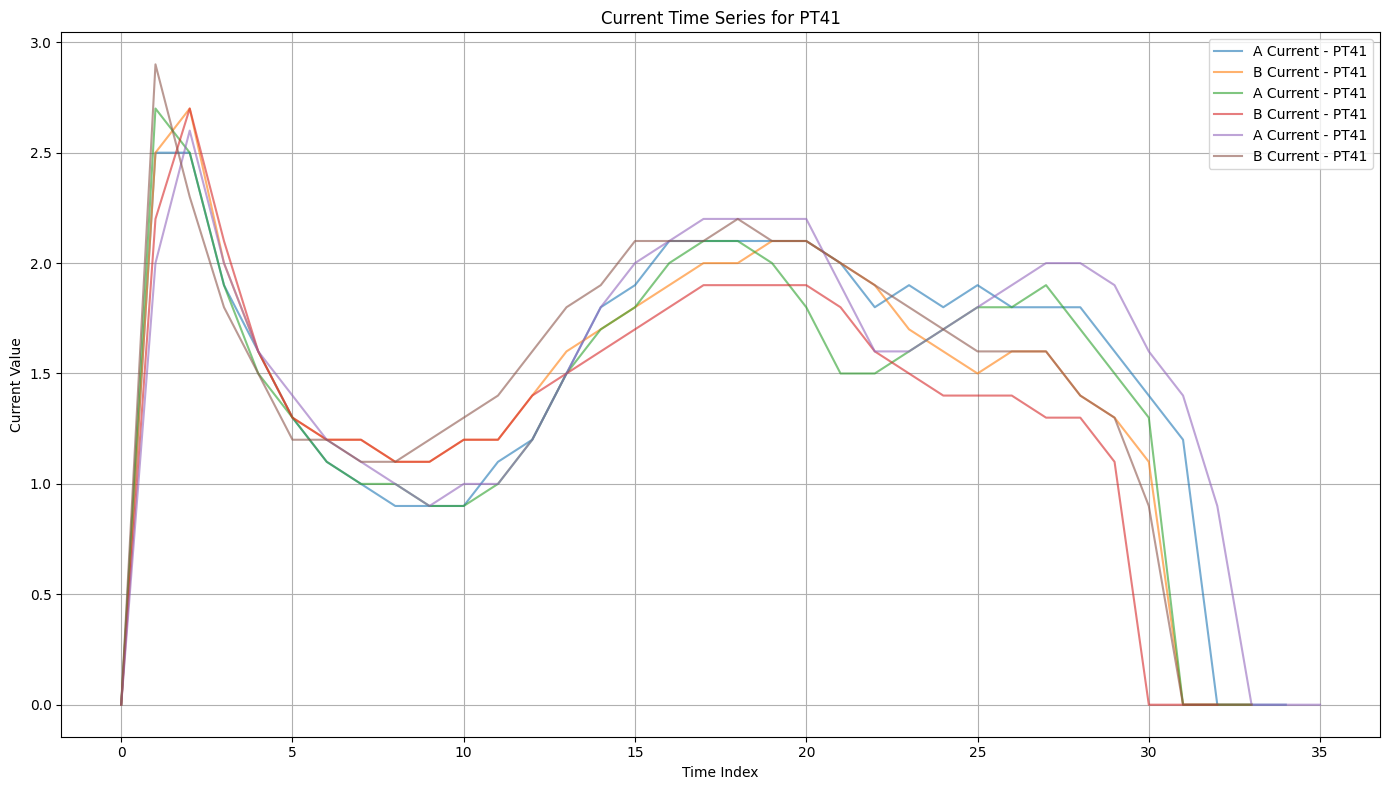

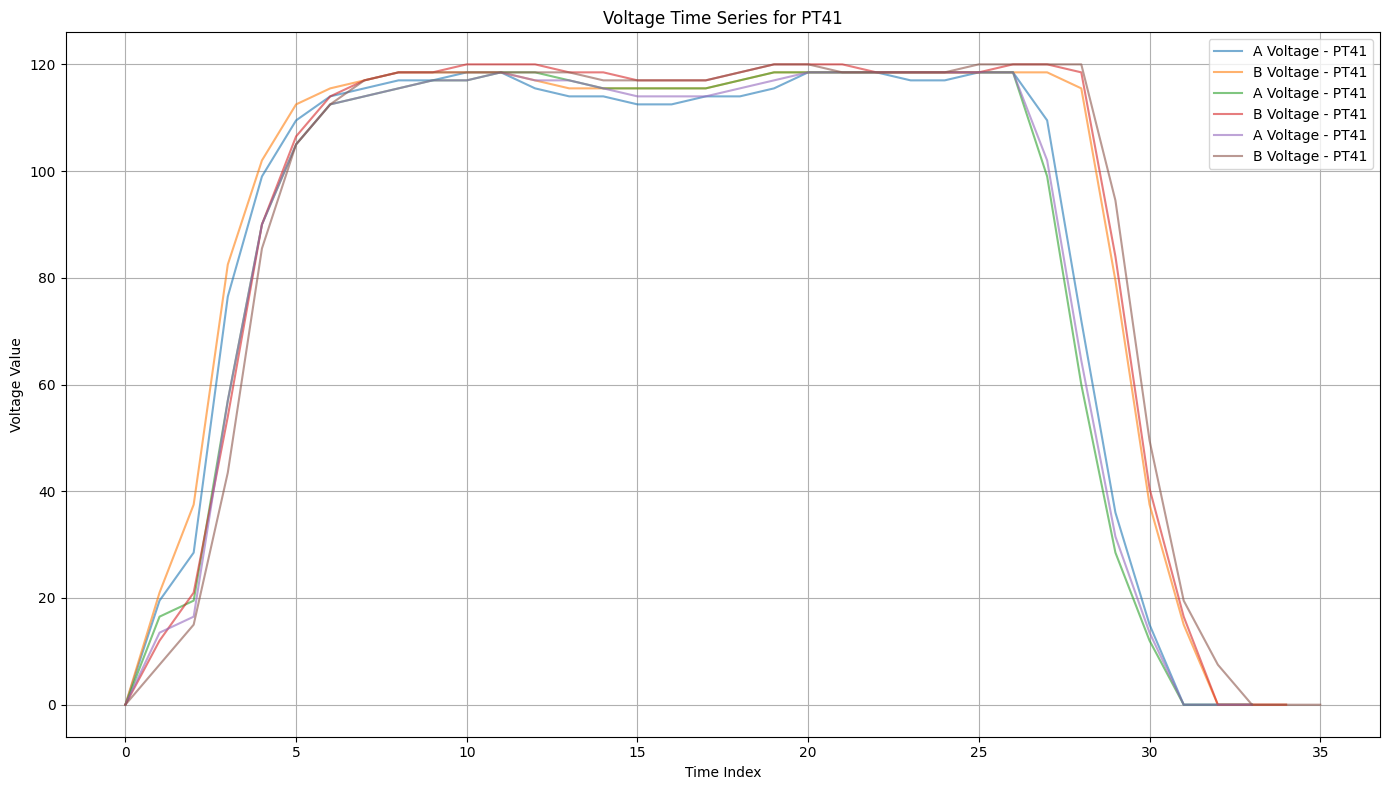

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Plot Current and Voltage Time Series for each Point Machine
def plot_filtered_time_series(filtered_df, n_samples=3):
    for machine in filtered_df['Point Machine Name'].unique():
        subset = filtered_df[filtered_df['Point Machine Name'] == machine].head(n_samples)
        
        plt.figure(figsize=(14, 8))
        
        for idx, row in subset.iterrows():
            # Plot A Current
            plt.plot(row['A Current'], label=f"A Current - {machine}", alpha=0.6)
            plt.plot(row['B Current'], label=f"B Current - {machine}", alpha=0.6)
            
        plt.title(f"Current Time Series for {machine}")
        plt.xlabel("Time Index")
        plt.ylabel("Current Value")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(14, 8))
        for idx, row in subset.iterrows():
            # Plot A Voltage
            plt.plot(row['A Voltage'], label=f"A Voltage - {machine}", alpha=0.6)
            plt.plot(row['B Voltage'], label=f"B Voltage - {machine}", alpha=0.6)
            
        plt.title(f"Voltage Time Series for {machine}")
        plt.xlabel("Time Index")
        plt.ylabel("Voltage Value")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Call function to plot filtered time series
plot_filtered_time_series(filtered_df)


In [11]:
import numpy as np
from scipy.signal import find_peaks
import pandas as pd

# Feature extraction function
def extract_features(ts):
    if not isinstance(ts, list) or len(ts) == 0 or all(pd.isna(ts)):
        return pd.Series([np.nan]*9)  # Return NaNs for empty or invalid series
    
    arr = np.array(ts)
    
    # Basic statistics
    mean = np.mean(arr)
    std = np.std(arr)
    maximum = np.max(arr)
    minimum = np.min(arr)
    total = np.sum(arr)
    duration = len(arr)
    range_val = maximum - minimum
    slope = (arr[-1] - arr[0]) / duration if duration > 1 else 0
    
    # Number of peaks
    peaks, _ = find_peaks(arr)
    num_peaks = len(peaks)
    
    return pd.Series([mean, std, maximum, minimum, range_val, total, duration, slope, num_peaks])

# Extract features for all point machines
features_df = pd.DataFrame()

# Apply feature extraction on A and B Current, A and B Voltage
for col in ['A Current', 'B Current', 'A Voltage', 'B Voltage']:
    features = filtered_df[col].apply(extract_features)
    features.columns = [f"{col}_{f}" for f in ['mean', 'std', 'max', 'min', 'range', 'sum', 'duration', 'slope', 'num_peaks']]
    features_df = pd.concat([features_df, features], axis=1)

# Add Point Machine Name as a separate column
features_df['Point Machine Name'] = filtered_df['Point Machine Name'].values

# Check the feature extraction results
features_df.shape
features_df.head()


A Current_mean  A Current_std  A Current_max  A Current_min  \
996         1.113333       0.605383            2.9            0.0   
997         1.044828       0.542400            2.6            0.0   
998         1.110345       0.607621            2.8            0.0   
999         1.060714       0.612570            3.1            0.0   
1000        1.127586       0.607367            2.9            0.0   

      A Current_range  A Current_sum  A Current_duration  A Current_slope  \
996               2.9           33.4                30.0              0.0   
997               2.6           30.3                29.0              0.0   
998               2.8           32.2                29.0              0.0   
999               3.1           29.7                28.0              0.0   
1000              2.9           32.7                29.0              0.0   

      A Current_num_peaks  B Current_mean  ...  B Voltage_mean  B Voltage_std  \
996                   2.0        1.232258  ...      102.583333      50.412397   
997                   3.0        1.096552  ...      104.954545      49.763739   
998                   2.0        1.183871  ...      104.057143      48.898404   
999                   3.0        1.078571  ...      101.514706      51.695586   
1000                  3.0        1.222581  ...      102.791667      49.733648   

      B Voltage_max  B Voltage_min  B Voltage_range  B Voltage_sum  \
996           135.0            0.0            135.0         3693.0   
997           136.5            0.0            136.5         3463.5   
998           135.0            0.0            135.0         3642.0   
999           136.5            0.0            136.5         3451.5   
1000          135.0            0.0            135.0         3700.5   

      B Voltage_duration  B Voltage_slope  B Voltage_num_peaks  \
996                 36.0              0.0                  1.0   
997                 33.0              0.0                  1.0   
998                 35.0              0.0                  2.0   
999                 34.0              0.0                  1.0   
1000                36.0              0.0                  2.0   

      Point Machine Name  
996                 PT74  
997                 PT74  
998                 PT74  
999                 PT74  
1000                PT74  

[5 rows x 37 columns]

In [46]:
features_df.to_csv(r"C:\Users\ndeep\Desktop\energy7\model\secr_features_wpm.csv")
print("saved")

saved


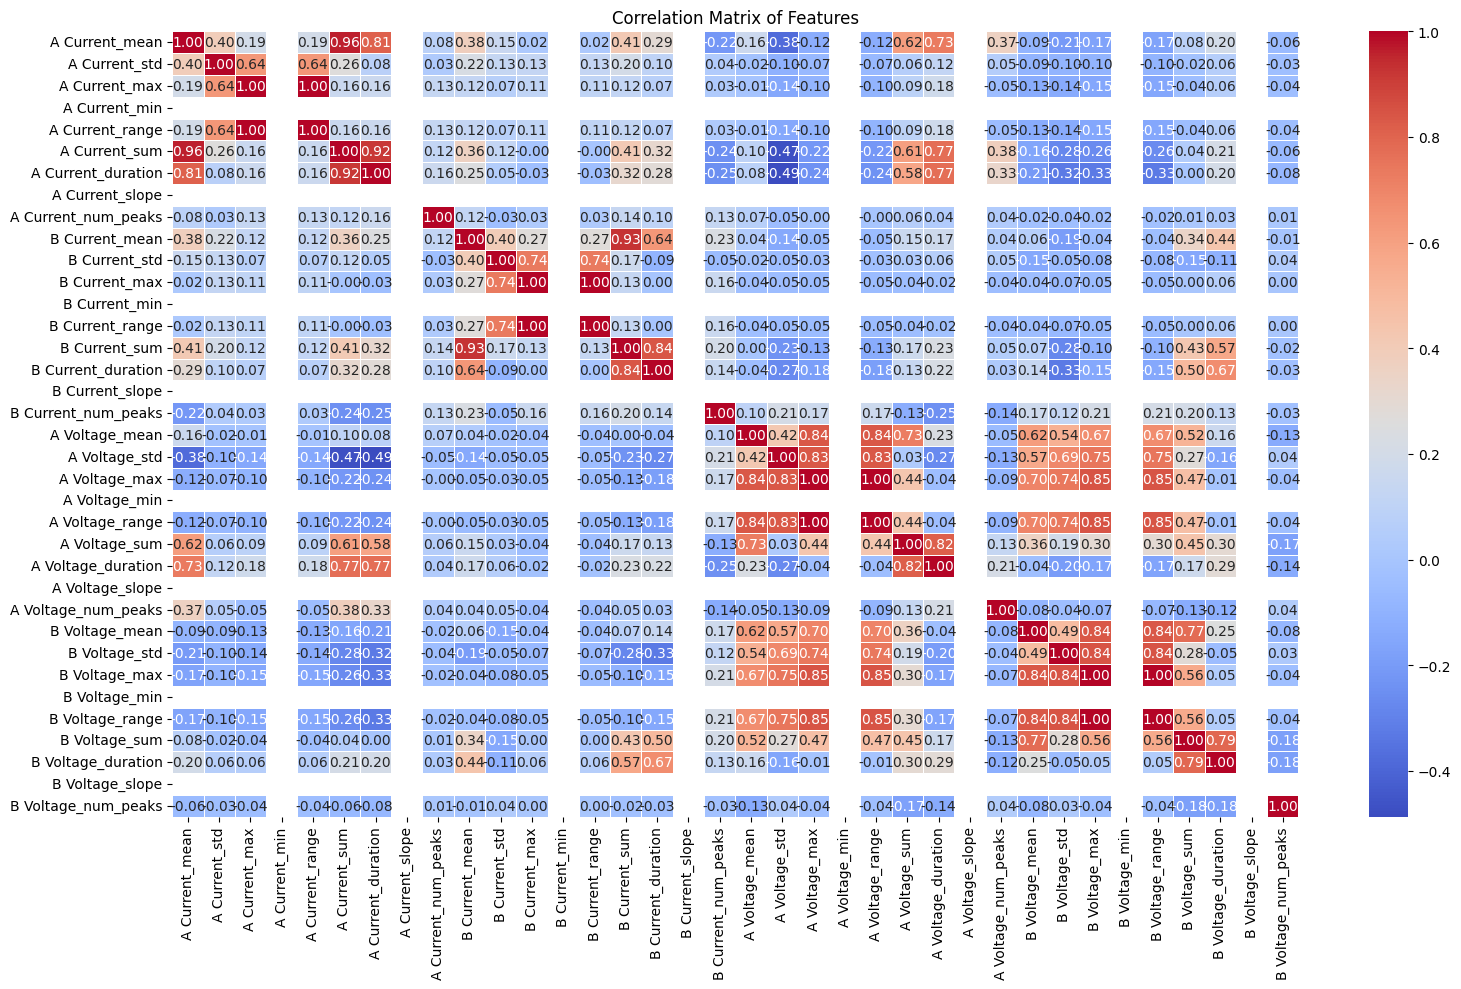

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude non-numeric columns like 'Point Machine Name'
numeric_columns = features_df.select_dtypes(include=['number']).columns

# Calculate the correlation matrix only for numeric columns
corr_matrix = features_df[numeric_columns].corr()

# Plot the heatmap to visually inspect correlations
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()


In [13]:
high_corr = corr_matrix[abs(corr_matrix) > 0.9]
print("Highly Correlated Features (Threshold > 0.9):")
print(high_corr)

Highly Correlated Features (Threshold > 0.9):
                     A Current_mean  A Current_std  A Current_max  \
A Current_mean             1.000000            NaN            NaN   
A Current_std                   NaN            1.0            NaN   
A Current_max                   NaN            NaN            1.0   
A Current_min                   NaN            NaN            NaN   
A Current_range                 NaN            NaN            1.0   
A Current_sum              0.964376            NaN            NaN   
A Current_duration              NaN            NaN            NaN   
A Current_slope                 NaN            NaN            NaN   
A Current_num_peaks             NaN            NaN            NaN   
B Current_mean                  NaN            NaN            NaN   
B Current_std                   NaN            NaN            NaN   
B Current_max                   NaN            NaN            NaN   
B Current_min                   NaN            NaN       

In [14]:
# Removing redundant features
df_cleaned = features_df.drop(columns=[
    'A Voltage_max', 'A Voltage_range', 'B Voltage_max', 'B Voltage_range', 
    'A Current_sum', 'B Current_sum', 'A Current_std', 'A Current_max', 
    'A Current_min', 'B Current_range', 'B Voltage_std', 'B Voltage_min'
])

# Check the cleaned dataset
print(df_cleaned.head())


      A Current_mean  A Current_range  A Current_duration  A Current_slope  \
996         1.113333              2.9                30.0              0.0   
997         1.044828              2.6                29.0              0.0   
998         1.110345              2.8                29.0              0.0   
999         1.060714              3.1                28.0              0.0   
1000        1.127586              2.9                29.0              0.0   

      A Current_num_peaks  B Current_mean  B Current_std  B Current_max  \
996                   2.0        1.232258       0.613497            2.5   
997                   3.0        1.096552       0.569623            2.6   
998                   2.0        1.183871       0.628925            2.9   
999                   3.0        1.078571       0.595433            3.0   
1000                  3.0        1.222581       0.641927            3.0   

      B Current_min  B Current_duration  ...  A Voltage_sum  \
996             0

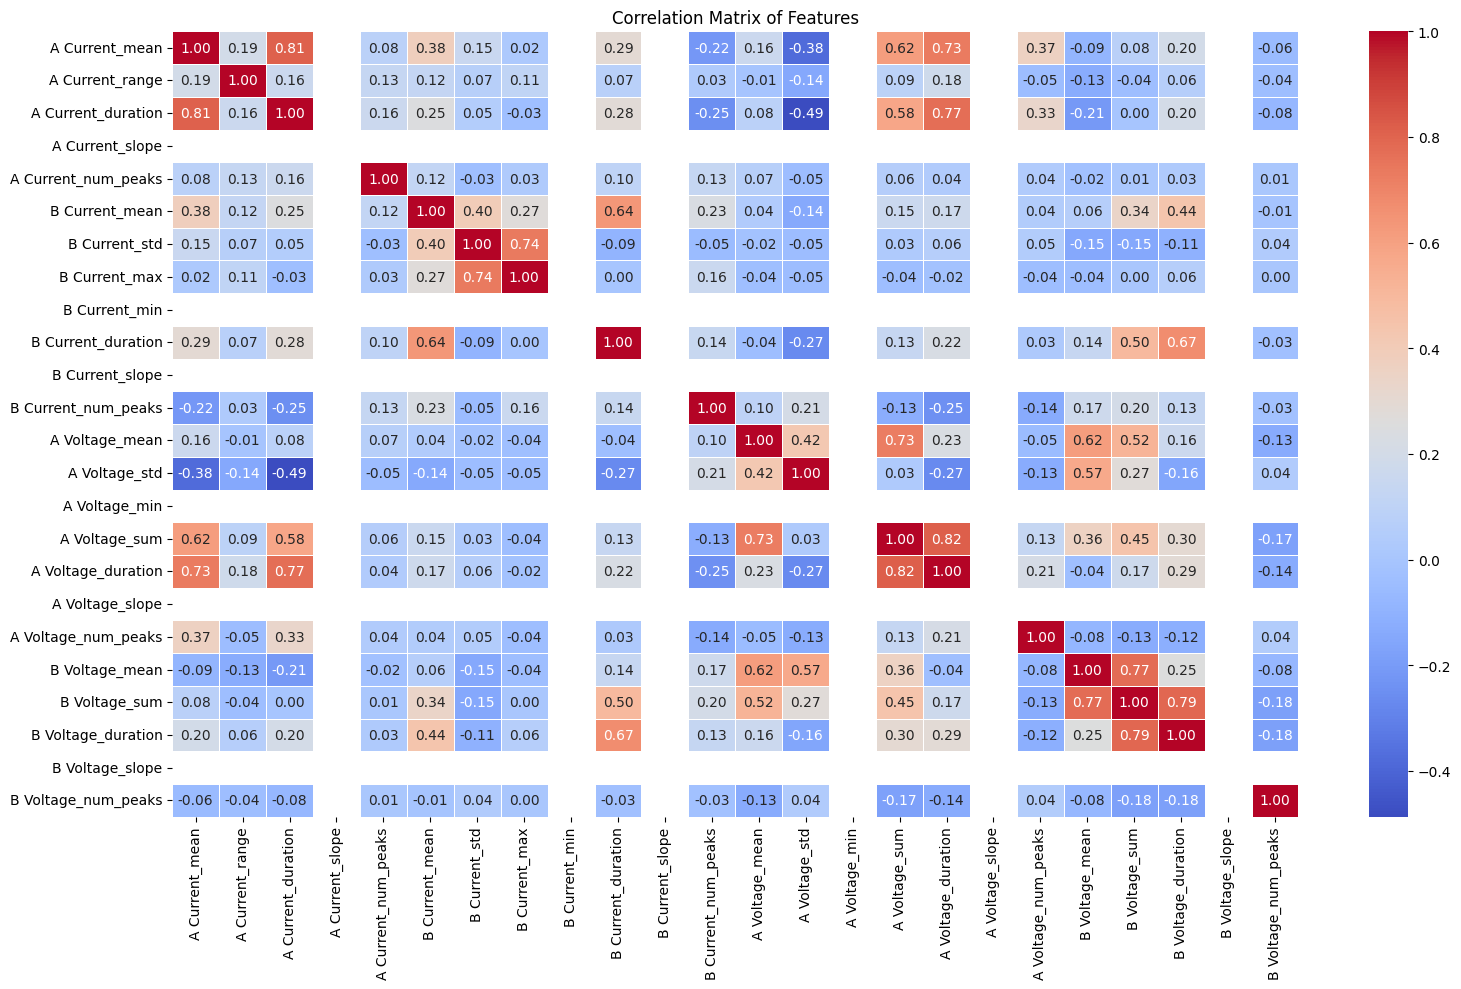

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude non-numeric columns like 'Point Machine Name'
numeric_columns = df_cleaned.select_dtypes(include=['number']).columns

# Calculate the correlation matrix only for numeric columns
corr_matrix = df_cleaned[numeric_columns].corr()

# Plot the heatmap to visually inspect correlations
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()


In [16]:
high_corr = corr_matrix[abs(corr_matrix) > 0.9]
print("Highly Correlated Features (Threshold > 0.9):")
print(high_corr)

Highly Correlated Features (Threshold > 0.9):
                     A Current_mean  A Current_range  A Current_duration  \
A Current_mean                  1.0              NaN                 NaN   
A Current_range                 NaN              1.0                 NaN   
A Current_duration              NaN              NaN                 1.0   
A Current_slope                 NaN              NaN                 NaN   
A Current_num_peaks             NaN              NaN                 NaN   
B Current_mean                  NaN              NaN                 NaN   
B Current_std                   NaN              NaN                 NaN   
B Current_max                   NaN              NaN                 NaN   
B Current_min                   NaN              NaN                 NaN   
B Current_duration              NaN              NaN                 NaN   
B Current_slope                 NaN              NaN                 NaN   
B Current_num_peaks             NaN       

In [54]:
df_cleaned.to_csv(r"C:\Users\ndeep\Desktop\energy7\model\secr_features_new_wpm.csv")
print("saved")

saved


In [17]:
from sklearn.preprocessing import StandardScaler

# Separate numeric and non-numeric columns
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns
non_numeric_cols = df_cleaned.select_dtypes(exclude=['number']).columns

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling only on numeric columns
scaled_data = df_cleaned[numeric_cols].copy()  # Create a copy to avoid altering the original dataframe
scaled_data[numeric_cols] = scaler.fit_transform(df_cleaned[numeric_cols])

# Add back the non-numeric columns (like 'Point Machine Name')
scaled_data[non_numeric_cols] = df_cleaned[non_numeric_cols]

# Check the result
print(scaled_data)


       A Current_mean  A Current_range  A Current_duration  A Current_slope  \
996          0.883403         0.768951            1.290461              0.0   
997          0.043580        -0.848130            0.692849              0.0   
998          0.846766         0.229924            0.692849              0.0   
999          0.238337         1.847006            0.095237              0.0   
1000         1.058131         0.768951            0.692849              0.0   
...               ...              ...                 ...              ...   
11838        4.181357        -0.309103            3.680909              0.0   
11939        4.537800        -0.848130            4.278521              0.0   
11989        4.432722         0.229924            4.278521              0.0   
11995        5.133245         0.768951            4.278521              0.0   
12081        4.642879        -0.848130            4.278521              0.0   

       A Current_num_peaks  B Current_mean  B Curre

In [38]:
scaled_data.to_csv(r"C:\Users\ndeep\Desktop\energy7\model\secr_features_scaled.csv")
print("saved")

saved


In [18]:
# Check for NaN values
nan_check = pd.isna(scaled_data).sum()
print(nan_check)


A Current_mean         0
A Current_range        0
A Current_duration     0
A Current_slope        0
A Current_num_peaks    0
B Current_mean         0
B Current_std          0
B Current_max          0
B Current_min          0
B Current_duration     0
B Current_slope        0
B Current_num_peaks    0
A Voltage_mean         0
A Voltage_std          0
A Voltage_min          0
A Voltage_sum          0
A Voltage_duration     0
A Voltage_slope        0
A Voltage_num_peaks    0
B Voltage_mean         0
B Voltage_sum          0
B Voltage_duration     0
B Voltage_slope        0
B Voltage_num_peaks    0
Point Machine Name     0
dtype: int64


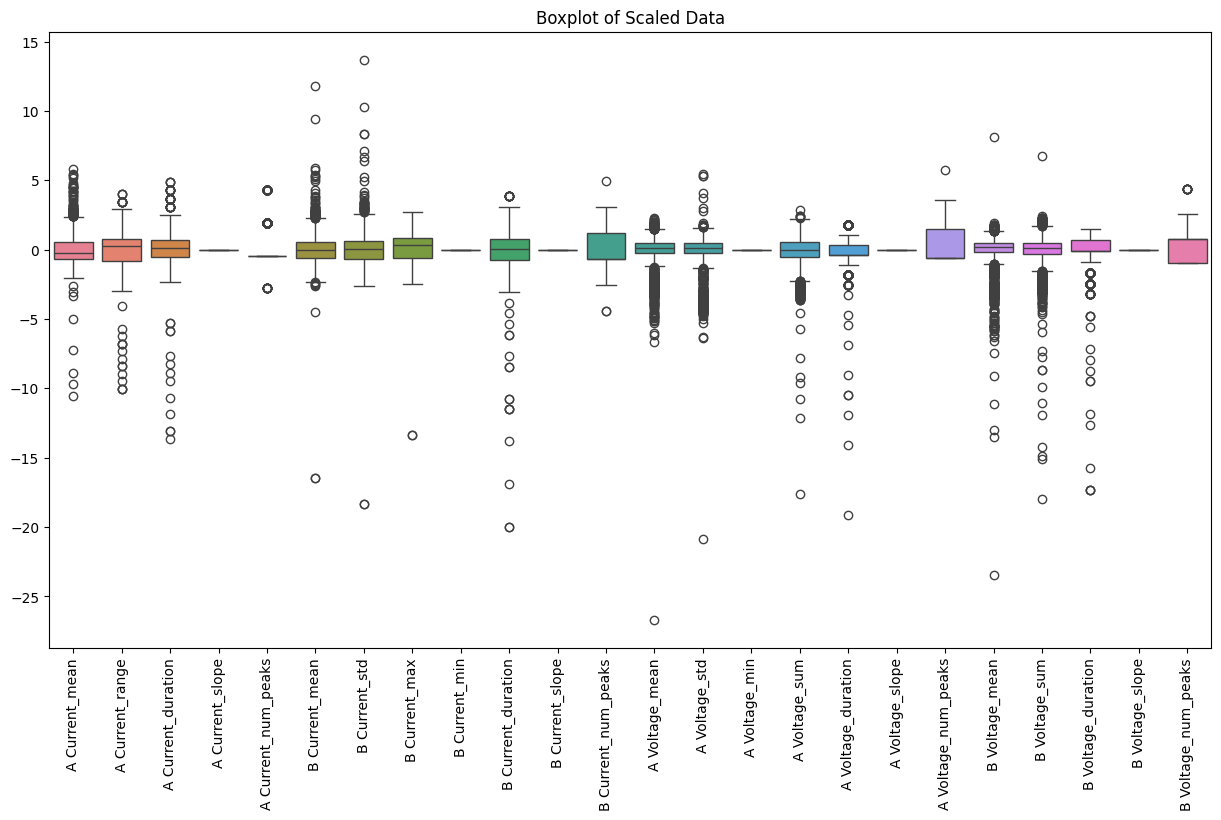

In [19]:
import seaborn as sns

# Boxplot for detecting outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=scaled_data)  # Apply the boxplot to the scaled data
plt.title('Boxplot of Scaled Data')
plt.xticks(rotation=90)  # Rotate x-axis labels for clarity
plt.show()


In [20]:
from scipy.stats import zscore

# Calculate the Z-scores only for the numeric columns
z_scores = np.abs(zscore(scaled_data.select_dtypes(include=['number'])))

# Identify rows where the Z-score is above a certain threshold (e.g., 3)
outliers = (z_scores > 3).sum(axis=1)

# Filter the rows with outliers
outlier_rows = scaled_data[outliers > 0]

print(outlier_rows)


       A Current_mean  A Current_range  A Current_duration  A Current_slope  \
1005         0.846766         0.768951            0.692849              0.0   
1014         0.593128        -1.387157            0.692849              0.0   
1018         0.194554        -0.848130            0.095237              0.0   
1020        -0.462186        -0.309103            0.095237              0.0   
1023        -0.505969         0.229924            0.095237              0.0   
...               ...              ...                 ...              ...   
11838        4.181357        -0.309103            3.680909              0.0   
11939        4.537800        -0.848130            4.278521              0.0   
11989        4.432722         0.229924            4.278521              0.0   
11995        5.133245         0.768951            4.278521              0.0   
12081        4.642879        -0.848130            4.278521              0.0   

       A Current_num_peaks  B Current_mean  B Curre

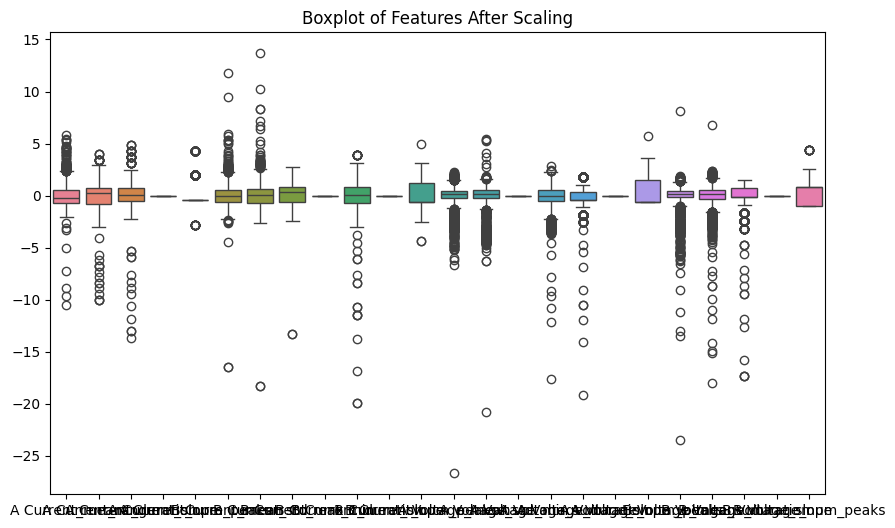

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=scaled_data)
plt.title("Boxplot of Features After Scaling")
plt.show()


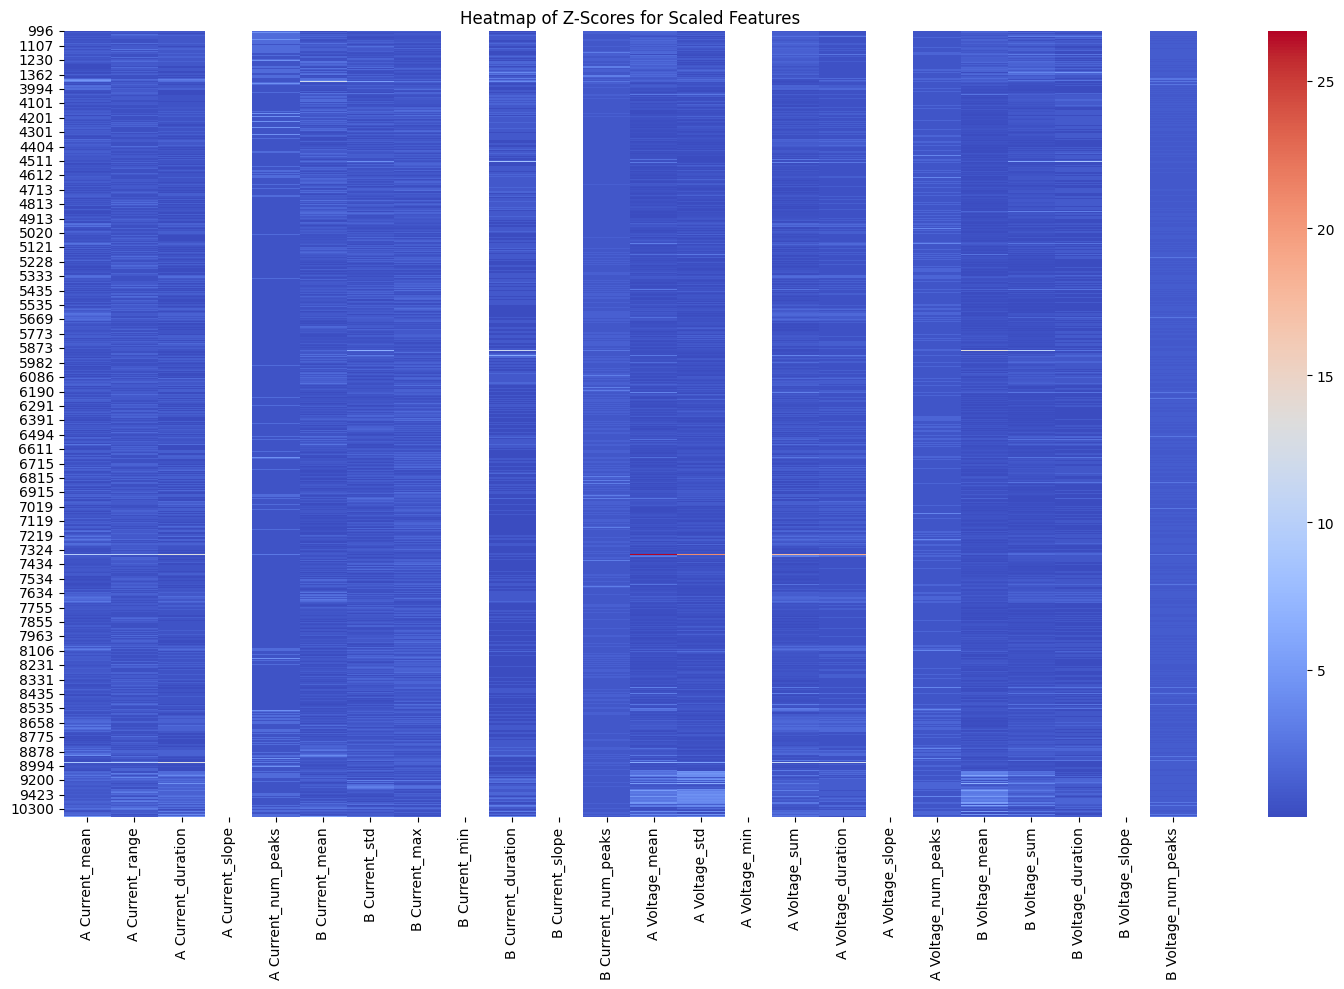

In [22]:
import numpy as np
from scipy.stats import zscore

# Calculate Z-scores
z_scores = np.abs(zscore(scaled_data.select_dtypes(include=['number'])))

# Plot Z-scores for each feature
plt.figure(figsize=(15, 10))
sns.heatmap(z_scores, annot=False, cmap='coolwarm', cbar=True)
plt.title("Heatmap of Z-Scores for Scaled Features")
plt.tight_layout()
plt.show()


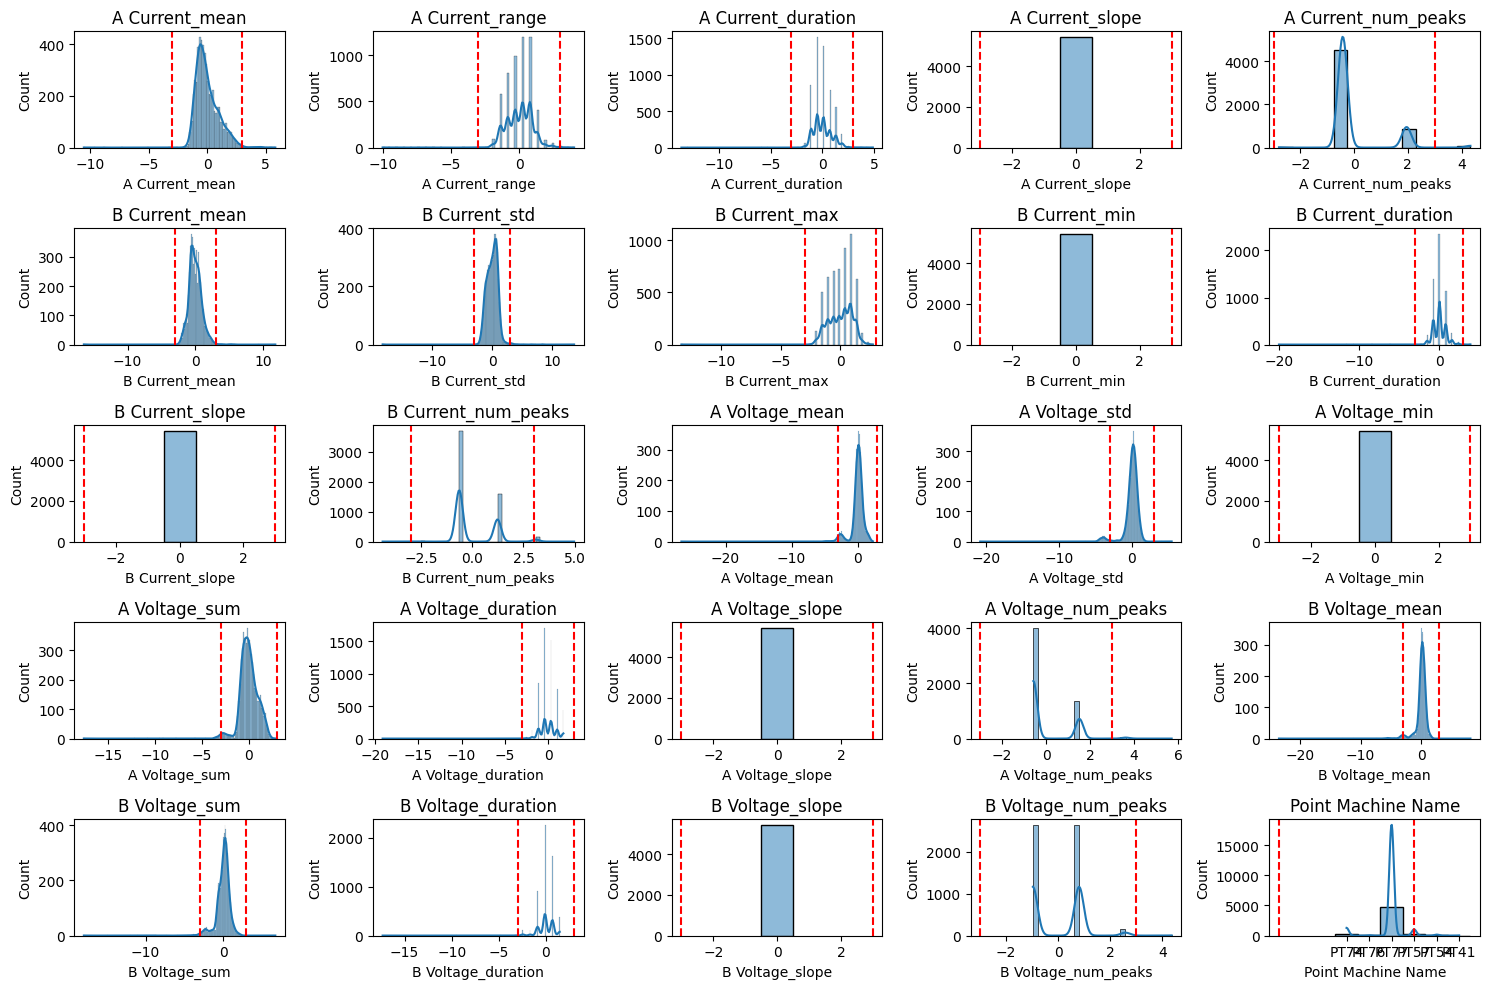

In [23]:
# Plot histograms with outliers indicated
plt.figure(figsize=(15, 10))

for i, col in enumerate(scaled_data.columns):
    plt.subplot(5, 5, i+1)  # Adjust subplot grid if necessary
    sns.histplot(scaled_data[col], kde=True)
    plt.axvline(x=3, color='red', linestyle='--')  # Highlight positive outliers
    plt.axvline(x=-3, color='red', linestyle='--')  # Highlight negative outliers
    plt.title(col)
    
plt.tight_layout()
plt.show()


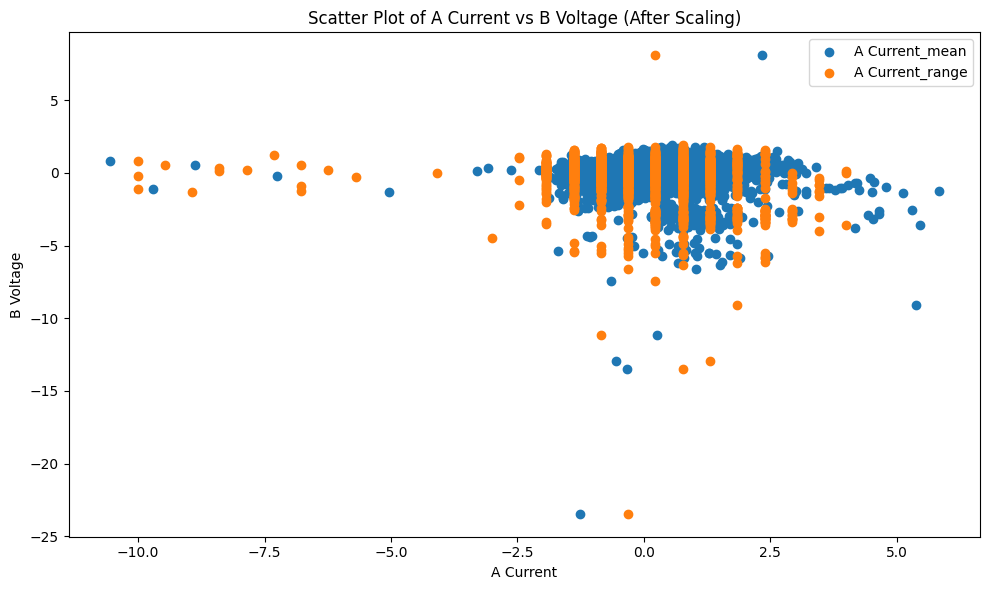

In [24]:
# Plot scatter plots for a pair of features
plt.figure(figsize=(10, 6))

for col in ['A Current_mean', 'A Current_range']:  # Example feature pair
    plt.scatter(scaled_data[col], scaled_data['B Voltage_mean'], label=col)

plt.title("Scatter Plot of A Current vs B Voltage (After Scaling)")
plt.xlabel("A Current")
plt.ylabel("B Voltage")
plt.legend()
plt.tight_layout()
plt.show()


Explained Variance Ratio: [0.72356202 0.27616388]
Total Explained Variance: 0.9997258927474995


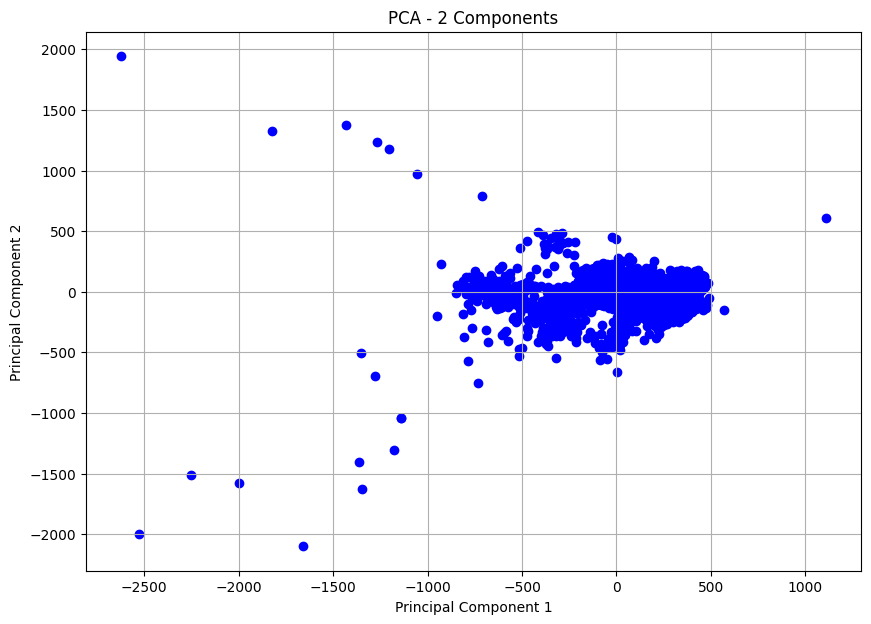

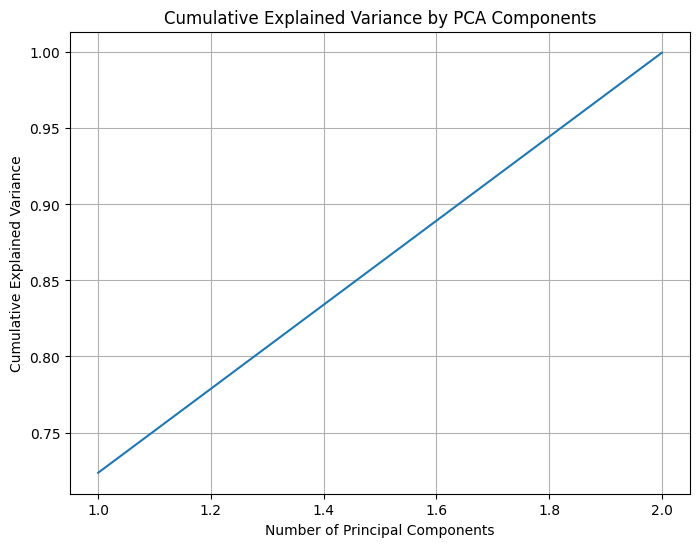

          PC1        PC2 Point Machine Name
0  395.603862  28.111662               PT74
1  142.230920 -51.004045               PT74
2  326.873237  21.919871               PT74
3  141.812665 -66.959373               PT74
4  381.851293  50.873127               PT74


In [29]:
# Ensure Point Machine Name column is not considered for PCA
point_machine_names = df_cleaned['Point Machine Name']

# Apply PCA to the already scaled data (ignoring the 'Point Machine Name' column)
from sklearn.decomposition import PCA

# Exclude 'Point Machine Name' column for PCA calculation
df_cleaned_numeric = df_cleaned.drop(columns=['Point Machine Name'])

# Apply PCA
pca = PCA(n_components=2)  # You can adjust the number of components here
pca_result = pca.fit_transform(df_cleaned_numeric)

# Explained variance ratio
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")
print(f"Total Explained Variance: {sum(pca.explained_variance_ratio_)}")

# Plot the PCA results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', label='Data Points')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - 2 Components')
plt.grid(True)
plt.show()

# Cumulative Explained Variance plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.show()

# Re-add the 'Point Machine Name' to the PCA results correctly by using the original index
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['Point Machine Name'] = point_machine_names.values  # Correctly re-assign the Point Machine Names

print(pca_df.head())


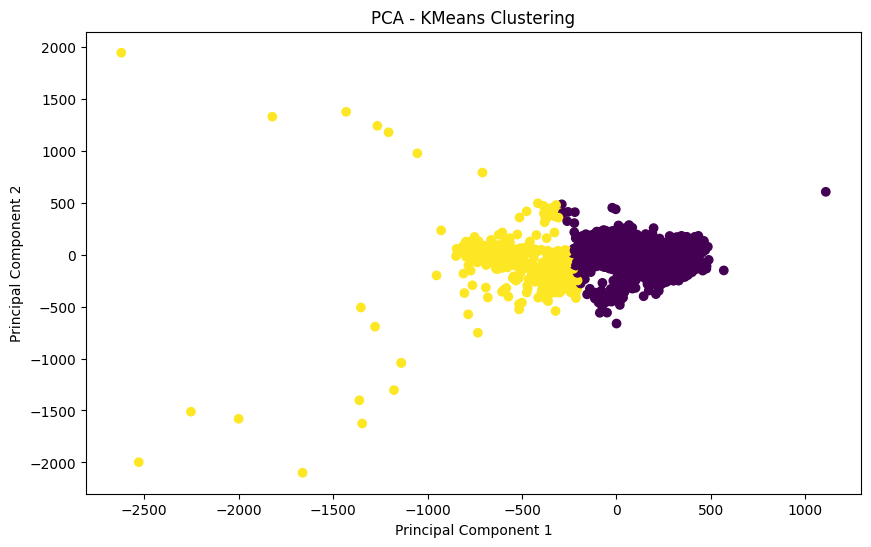

     Point Machine Name         PC1         PC2  Cluster
0                  PT74  395.603862   28.111662        0
1                  PT74  142.230920  -51.004045        0
2                  PT74  326.873237   21.919871        0
3                  PT74  141.812665  -66.959373        0
4                  PT74  381.851293   50.873127        0
...                 ...         ...         ...      ...
5439               PT54  224.267772 -347.916403        0
5440               PT54  198.692864 -249.229446        0
5441               PT54  100.974653 -320.432671        0
5443               PT54 -548.952082 -226.087882        1
5444               PT54  208.740122 -380.424645        0

[2324 rows x 4 columns]


In [36]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

# Assuming pca_df already contains PCA components and Point Machine Names

# Fit KMeans model with 2 clusters (you can try 3 or more if needed)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(pca_df[['PC1', 'PC2']])

# Predict cluster labels
pca_df['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis')
plt.title('PCA - KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Identify anomalies (points far from cluster centroids)
distance_from_centroid = kmeans.transform(pca_df[['PC1', 'PC2']])  # Calculate distance to centroids
threshold = distance_from_centroid.max(axis=1).mean()  # Set a threshold based on average distance
outliers = pca_df[distance_from_centroid.max(axis=1) > threshold]

# Show the outliers along with their Point Machine Names
print(outliers[['Point Machine Name', 'PC1', 'PC2', 'Cluster']])



     Point Machine Name         PC1         PC2  Anomaly_IF  Cluster
7                  PT74  483.780363   75.546094          -1        0
9                  PT74  -70.183108 -458.555904          -1        0
12                 PT74  461.718513  118.116272          -1        0
13                 PT74  435.594928   85.090084          -1        0
35                 PT74 -638.996737 -129.078496          -1        1
...                 ...         ...         ...         ...      ...
5439               PT54  224.267772 -347.916403          -1        0
5441               PT54  100.974653 -320.432671          -1        0
5442               PT54 -304.933504 -292.776823          -1        1
5443               PT54 -548.952082 -226.087882          -1        1
5444               PT54  208.740122 -380.424645          -1        0

[273 rows x 5 columns]


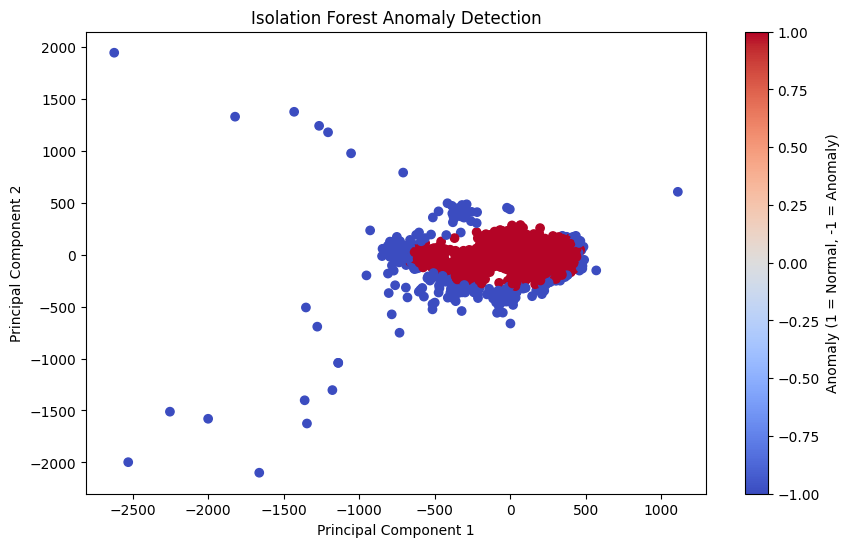

In [37]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import matplotlib.pyplot as plt

# Assuming pca_df contains the PCA components and Point Machine Names
# We will perform Isolation Forest anomaly detection using the PC1 and PC2 features

# Initialize the IsolationForest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Fit the model using the PCA components (ignoring Point Machine Names)
iso_forest.fit(pca_df[['PC1', 'PC2']])

# Predict anomalies: -1 = anomaly, 1 = normal
pca_df['Anomaly_IF'] = iso_forest.predict(pca_df[['PC1', 'PC2']])

# Identify the faulty point machines (outliers with Anomaly_IF = -1)
faulty_point_machines = pca_df[pca_df['Anomaly_IF'] == -1]

# Show the faulty point machines along with their principal components and anomaly labels
print(faulty_point_machines[['Point Machine Name', 'PC1', 'PC2', 'Anomaly_IF', 'Cluster']])

# Visualize the anomalies
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Anomaly_IF'], cmap='coolwarm', marker='o')
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Anomaly (1 = Normal, -1 = Anomaly)')
plt.show()


In [45]:
new_df = pd.read_csv(r"C:\Users\ndeep\Desktop\energy7\model\secr_features_scaled.csv")
new_df.drop(columns=['Point Machine Name'])

new_df.head()

Unnamed: 0  A Current_mean  A Current_range  A Current_duration  \
0         996        0.883403         0.768951            1.290461   
1         997        0.043580        -0.848130            0.692849   
2         998        0.846766         0.229924            0.692849   
3         999        0.238337         1.847006            0.095237   
4        1000        1.058131         0.768951            0.692849   

   A Current_slope  A Current_num_peaks  B Current_mean  B Current_std  \
0              0.0            -0.423049        1.973350       0.302774   
1              0.0             1.952737       -0.055304      -1.029762   
2              0.0            -0.423049        1.250018       0.771340   
3              0.0             1.952737       -0.324089      -0.245863   
4              0.0             1.952737        1.828684       1.166258   

   B Current_max  B Current_min  ...  A Voltage_sum  A Voltage_duration  \
0      -1.533561            0.0  ...       1.481958            1.042123   
1      -1.061316            0.0  ...       0.756722           -0.398358   
2       0.355418            0.0  ...       1.229348            1.042123   
3       0.827662            0.0  ...       0.813763            0.321883   
4       0.827662            0.0  ...       1.343430            1.042123   

   A Voltage_slope  A Voltage_num_peaks  B Voltage_mean  B Voltage_sum  \
0              0.0            -0.582317        0.813208       1.626661   
1              0.0            -0.582317        1.499704       0.329625   
2              0.0            -0.582317        1.239894       1.338431   
3              0.0            -0.582317        0.503827       0.261806   
4              0.0            -0.582317        0.873523       1.669048   

   B Voltage_duration  B Voltage_slope  B Voltage_num_peaks  \
0            1.475008              0.0            -0.974327   
1           -0.875665              0.0            -0.974327   
2            0.691450              0.0             0.803787   
3           -0.092107              0.0            -0.974327   
4            1.475008              0.0             0.803787   

   Point Machine Name  
0                PT74  
1                PT74  
2                PT74  
3                PT74  
4                PT74  

[5 rows x 26 columns]

In [42]:
from sklearn.ensemble import IsolationForest

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Fit the model to the data
iso_forest.fit(new_df)

# Predict anomalies (-1 indicates anomaly, 1 indicates normal)
new_df['Anomaly_IF'] = iso_forest.predict(new_df)

# Check the number of anomalies
print(f"Number of anomalies detected: {sum(new_df['Anomaly_IF'] == -1)}")


ValueError: could not convert string to float: 'PT74'